Improved Outline: SirtaX Model Benchmark
Preamble: Notebook Setup
•	Cell 0.1: Install Dependencies: pip install all required libraries (xgboost, tensorflow, scikit-learn, statsmodels, dtaidistance, etc.).
•	Cell 0.2: Import Libraries: Import all necessary packages (pandas, numpy, seaborn, matplotlib, sklearn, tensorflow.keras, etc.).
•	Cell 0.3: Global Configuration: Define constants and configurations to be used throughout the notebook:
o	TARGET_COL = 'TGBT'
o	RANDOM_STATE = 42
o	Plotting styles and warning suppression.
________________________________________
Section 1: Introduction and Objective
•	Purpose: Define the project's context, goals, and methodology, like the abstract of a research paper.
•	Content (Markdown):
o	1.1: Problem Statement: Describe the goal of forecasting hourly energy consumption for the Drahi-X nanogrid, noting its real-world complexities like non-stationarity and multiple seasonalities.
o	1.2: Objective: State the primary goal: To rigorously benchmark a diverse set of forecasting models (classical, gradient boosting, and deep learning) for multi-step-ahead prediction using a robust evaluation framework.
o	1.3: Methodology Overview: Briefly outline the scientific approach: rolling-window cross-validation, systematic feature engineering, and a comparative analysis of model performance based on accuracy, stability, and statistical significance.
Section 2: Data Loading and Initial Preprocessing
•	Purpose: Load the dataset and perform essential cleaning and type conversions.
•	Actions:
o	2.1: Load Data: Load the raw CSV file into a pandas DataFrame.
o	2.2: Initial Cleaning:
	Rename columns for easier access (e.g., "Date and time (UTC)" to "Datetime").
	Convert the Datetime column to a pandas datetime object and set it as the index.
	Handle missing values (e.g., using forward fill).
o	2.3 (Optional): Denoising: Apply a Kalman Filter to smooth the target variable, creating a new df_kalman DataFrame for subsequent steps.
Section 3: Exploratory Data Analysis (EDA) & Stationarity
•	Purpose: Understand the statistical properties and patterns of the time series to inform feature engineering and modeling choices.
•	Actions:
o	3.1: Time Series Visualization: Plot the target variable over the entire duration to observe long-term trends and seasonality.
o	3.2: Seasonality Analysis: Use seasonal boxplots (by hour, day of week, month) to visualize cyclical patterns.
o	3.3: Stationarity Tests:
	Perform ADF (Augmented Dickey-Fuller) test to check for a unit root.
	Perform KPSS (Kwiatkowski-Phillips-Schmidt-Shin) test to check for trend stationarity.
	Conclusion (Markdown): Summarize the findings and state that the series is non-stationary, justifying the need for features that can handle this.
o	3.4: Autocorrelation Analysis:
	Plot the ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) to identify the "memory" of the series and confirm seasonality.
Section 4: Feature Engineering Pipeline
•	Purpose: Define reusable functions to create predictive features from the time series data. This modular approach is crucial for the cross-validation loop.
•	Actions (define as functions):
o	4.1: Time-Based Features: Create features like hour, dayofweek, month, year, quarter, dayofyear.
o	4.2: Lag Features: Create features based on past values of the target variable (e.g., lag_1, lag_24, lag_168).
o	4.3: Rolling Window Features: Create features like rolling mean, standard deviation, and skewness over various windows (e.g., 24 hours, 7 days).
o	4.4 (Optional Advanced): Create B-Spline features for capturing complex seasonalities.
Section 5: Model Definition
•	Purpose: Define the architecture for each model to be benchmarked. This centralizes model code and keeps the main experiment loop clean.
•	Actions (define as functions):
•  Statistical Baseline:
•	SARIMAX: Used in a random-walk forecasting setup as a classical statistical baseline.
•  Classic Machine Learning Baselines:
•	LinearRegression: The simplest linear model to establish a performance floor.
•	KNeighborsRegressor: A non-parametric instance-based model.
•	MLPRegressor: A basic feed-forward neural network from scikit-learn.
•  Advanced Ensemble Model:
•	XGBRegressor (XGBoost): A powerful gradient-boosting model known for high performance on tabular data.
•  Advanced Hybrid Approaches:
•	Decomposition + ML Model: A two-stage model where the time series is first decomposed (e.g., using STL) and a powerful model like XGBoost is then trained on the complex residual component.
•  Interpretable Deep Learning Models:
•	N-BEATS (Neural Basis Expansion Analysis): A state-of-the-art deep learning model designed for interpretability by decomposing the forecast into trend and seasonality blocks.
•	NeuralProphet: An evolution of Facebook's Prophet that integrates deep learning components (AR-Net) for improved accuracy while maintaining high interpretability.
•  Deep Learning Sequence Models (End-to-End):
•	BiLSTM (Bidirectional LSTM): The standard recurrent neural network baseline for sequence modeling.
•	CNN (WaveNet-style): A purely convolutional architecture using dilated convolutions to efficiently capture long-range dependencies, offering a different approach from recurrent or attention mechanisms.
•	CNN-LSTM Hybrid: A popular architecture using CNN layers for spatial feature extraction from subsequences, which are then interpreted by an LSTM layer for temporal modeling.
•	TCN-BiLSTM: The hybrid model from the original notebook combining Temporal Convolutional Networks and LSTMs.
•	Time2Vec-BiLSTM: A hybrid model combining the Time2Vec embedding with a BiLSTM.
•	Time2Vec-Transformer: The advanced, state-of-the-art attention-based architecture from the reference PDF.
Section 6: Benchmarking via Rolling Cross-Validation
•	Purpose: The core of the notebook. Systematically train and evaluate each model across multiple time-ordered folds to get a robust estimate of performance.
•	Actions:
o	6.1: Setup:
	Initialize TimeSeriesSplit from scikit-learn.
	Define a dictionary of models to test: {'XGBoost': create_xgboost_model, 'BiLSTM': create_bilstm_model, ...}.
	Initialize a list or DataFrame to store all results.
o	6.2: The Main Experiment Loop:
	Outer loop: Iterate through each model_name, model_function in the models dictionary.
	Inner loop: Iterate through the train_index, val_index from tscv.split().
	Data Split: Create train_fold and val_fold data for the current split.
	Feature Engineering: Apply the feature engineering functions (from Section 4) to train_fold and val_fold.
	Scaling: Initialize a MinMaxScaler. Fit it only on the train_fold features and then transform both train_fold and val_fold.
	Model Training: Instantiate and train the current model on the scaled train_fold data.
	Prediction: Generate forecasts on the scaled val_fold data.
	Evaluation: Calculate performance metrics (MAE, RMSE, MAPE) and store them along with the fold number and model name.
o	6.3: Consolidate Results: Combine the results from all folds and models into a single, clean DataFrame.
Section 7: Results Analysis and Discussion
•	Purpose: To interpret the results of the benchmark, identify the best model, and analyze performance stability.
•	Actions:
o	7.1: Aggregate Performance: Display a pivot table showing the mean and standard deviation of each metric for each model across all folds.
o	7.2: Performance Visualization: Use boxplots to visualize the distribution of a key metric (e.g., MAE) for each model. This is crucial for assessing performance stability and consistency.
o	7.3 (Optional): Statistical Significance: Perform a statistical test (e.g., Wilcoxon signed-rank test) to determine if the best-performing model is significantly better than the others.
o	7.4: Best Model Forecast Visualization: Select the best overall model. Plot its predictions against the actual values for a representative validation fold to visually inspect its performance.
Section 8: Conclusion
•	Purpose: A final markdown cell to summarize the findings of the study.
•	Content (Markdown):
o	8.1: Summary of Findings: State which model performed best according to the aggregate metrics (e.g., "The Time2Vec Transformer achieved the lowest mean MAE of X...").
o	8.2: Model Stability: Comment on the models' stability using insights from the boxplots and standard deviations (e.g., "While XGBoost was competitive, the BiLSTM model showed lower variance across folds, indicating more stable performance.").
o	8.3: Final Recommendation: Provide a clear recommendation for which model to deploy for this specific forecasting task, justifying the choice based on the evidence gathered.




**Preamble: Notebook Setup**

This initial section handles all the necessary setup to ensure the notebook runs smoothly and reproducibly. It is divided into three parts:

Dependency Installation: A single command to install all required Python libraries.

Library Imports: A central location for all import statements.

Global Configuration: A cell to define constants, set random seeds, and configure plotting styles for the entire analysis.

**Cell 0.1: Install Dependencies**

This cell installs all the external libraries needed for the analysis. The -q flag ensures a quiet installation, showing only errors.

In [1]:
!pip install -q pandas numpy scikit-learn matplotlib seaborn xgboost tensorflow statsmodels dtaidistance pykalman patsy darts neuralprophet dtaidistance
!pip install -q arch tsfeatures

In [2]:
#!pip install -q "numpy>=1.26,<2.0" pandas seaborn matplotlib statsmodels holidays

**Cell 0.2: Import Libraries**

All necessary packages for data manipulation, visualization, time series analysis, and modeling are imported here.

In [3]:
# --- Core Libraries for Data Handling and Numerics ---
import pandas as pd
import numpy as np
import warnings
import os

# --- Visualization Libraries ---
import matplotlib.pyplot as plt
import seaborn as sns

# --- Time Series Analysis & Statistics ---
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# --- Scikit-Learn for Preprocessing, Metrics, and Model Selection ---
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# --- Machine Learning Models ---
import xgboost as xgb

# --- Deep Learning with TensorFlow and Keras ---
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, Bidirectional, Conv1D, GRU, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# --- Global Constants ---
TARGET_COL = 'TGBT'
RANDOM_STATE = 42

# --- Seeding for Reproducibility ---
np.random.seed(RANDOM_STATE)
tf.random.set_seed(RANDOM_STATE)
os.environ['PYTHONHASHSEED'] = str(RANDOM_STATE)

# --- Plotting and Environment Configuration ---
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (18, 8)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
warnings.filterwarnings('ignore')


**Section 2: Data Loading and Initial Preprocessing**

Purpose: To load the raw dataset, perform initial cleaning, and ensure it is correctly formatted for time series analysis. This foundational step is crucial for the reliability of all subsequent modeling.

**2.1: Load Data**

Here, we load the dataset from the specified file path into a pandas DataFrame and perform a preliminary inspection to understand its structure, size, and data types.

In [4]:
# --- Define the path to your data file ---
from google.colab import drive
drive.mount('/content/gdrive')
file_path = 'gdrive/My Drive/Colab Notebooks/DrahiX_power_consumption_forecast--main/data/DrahiX_SIRTA_allzones_20160715_20210520_1h.csv'

# --- Load the dataset into a pandas DataFrame ---
try:
    df_raw = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"Error: The file was not found at the specified path: {file_path}")
    print("Please update the 'file_path' variable with the correct location of your dataset.")
    df_raw = pd.DataFrame() # Create an empty DataFrame to avoid further errors

# --- Initial Inspection ---
if not df_raw.empty:
    print(f"\nDataset Shape: {df_raw.shape[0]} rows and {df_raw.shape[1]} columns")

    print("\nFirst 5 rows of the raw dataset:")
    display(df_raw.head())

    print("\nData types and non-null counts:")
    df_raw.info()


Mounted at /content/gdrive
Dataset loaded successfully.

Dataset Shape: 42481 rows and 13 columns

First 5 rows of the raw dataset:


,Date and time (UTC),Global_Solar_Flux,Direct_Solar_Flux,Diffuse_Solar_Flux,AirTemp,TGBT,T1,T2,T3,T4,T5,T6,T7
0,2016-07-15 00:00:00+00:00,-1.03,-0.53,-1.38,12.41,9.37,0.99,2.12,0.19,1.50,1.41,0.26,2.64
1,2016-07-15 01:00:00+00:00,-1.05,-0.44,-1.36,12.12,9.78,0.99,2.17,0.17,1.69,1.57,0.54,2.36
2,2016-07-15 02:00:00+00:00,-1.05,-0.46,-1.34,11.54,10.95,1.13,2.31,0.34,1.66,1.68,0.33,3.18
3,2016-07-15 03:00:00+00:00,-0.48,-0.41,-0.75,11.28,13.73,1.31,2.40,0.89,1.64,1.78,0.54,4.81
4,2016-07-15 04:00:00+00:00,32.49,127.50,16.05,10.77,14.24,1.17,2.29,0.27,2.10,2.10,0.76,5.25



Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42481 entries, 0 to 42480
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date and time (UTC)  42481 non-null  object 
 1   Global_Solar_Flux    42459 non-null  float64
 2   Direct_Solar_Flux    42459 non-null  float64
 3   Diffuse_Solar_Flux   42459 non-null  float64
 4   AirTemp              42440 non-null  float64
 5   TGBT                 42471 non-null  float64
 6   T1                   42471 non-null  float64
 7   T2                   42471 non-null  float64
 8   T3                   42471 non-null  float64
 9   T4                   42471 non-null  float64
 10  T5                   42471 non-null  float64
 11  T6                   42471 non-null  float64
 12  T7                   42471 non-null  float64
dtypes: float64(12), object(1)
memory usage: 4.2+ MB


**2.2: Initial Cleaning**

This cell performs several fundamental preprocessing tasks to prepare the DataFrame for time series analysis:

Rename Columns: The primary date column "Date and time (UTC)" is renamed to "Datetime" for simpler and more programmatic access.

Set DatetimeIndex: The "Datetime" column is converted from a string/object type to a proper pandas.DatetimeIndex. This is essential for time-based slicing, resampling, and plotting.

Handle Missing Values: A forward-fill (ffill) strategy is applied. This method propagates the last known valid observation forward, which is a reasonable starting assumption for sensor data where values do not typically change instantaneously.

In [5]:
# --- Create a working copy to preserve the raw data ---
df = df_raw.copy()

# --- Check if the DataFrame is not empty before proceeding ---
if not df.empty:
    # 1. Rename the main datetime column for easier access
    if "Date and time (UTC)" in df.columns:
        df.rename(columns={"Date and time (UTC)": "Datetime"}, inplace=True)
        print("Column 'Date and time (UTC)' renamed to 'Datetime'.")
    else:
        print("Warning: Column 'Date and time (UTC)' not found. Skipping rename.")

    # 2. Convert the 'Datetime' column to a pandas datetime object and set it as the index
    if "Datetime" in df.columns:
        try:
            df['Datetime'] = pd.to_datetime(df['Datetime'])
            df.set_index('Datetime', inplace=True)
            print(f"Index successfully set to DatetimeIndex. Index type: {type(df.index)}")
        except Exception as e:
            print(f"Error converting or setting the DatetimeIndex: {e}")
    else:
        print("Error: 'Datetime' column not found. Cannot set index.")


    # 3. Handle missing values using forward fill
    initial_nulls = df.isnull().sum().sum()
    print(f"\nTotal missing values before fill: {initial_nulls}")

    df.fillna(method='ffill', inplace=True)

    remaining_nulls = df.isnull().sum().sum()
    print(f"Total missing values after forward fill: {remaining_nulls}")
    if remaining_nulls > 0:
        print("Note: Remaining NaNs suggest missing values at the very beginning of the dataset.")

    # --- Display the cleaned DataFrame ---
    print("\nFirst 5 rows of the cleaned and indexed dataset:")
    display(df.head())

else:
    print("DataFrame is empty. Skipping cleaning steps.")

Column 'Date and time (UTC)' renamed to 'Datetime'.
Index successfully set to DatetimeIndex. Index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>

Total missing values before fill: 187
Total missing values after forward fill: 0

First 5 rows of the cleaned and indexed dataset:


,Global_Solar_Flux,Direct_Solar_Flux,Diffuse_Solar_Flux,AirTemp,TGBT,T1,T2,T3,T4,T5,T6,T7
Datetime,,,,,,,,,,,,
2016-07-15 00:00:00+00:00,-1.03,-0.53,-1.38,12.41,9.37,0.99,2.12,0.19,1.50,1.41,0.26,2.64
2016-07-15 01:00:00+00:00,-1.05,-0.44,-1.36,12.12,9.78,0.99,2.17,0.17,1.69,1.57,0.54,2.36
2016-07-15 02:00:00+00:00,-1.05,-0.46,-1.34,11.54,10.95,1.13,2.31,0.34,1.66,1.68,0.33,3.18
2016-07-15 03:00:00+00:00,-0.48,-0.41,-0.75,11.28,13.73,1.31,2.40,0.89,1.64,1.78,0.54,4.81
2016-07-15 04:00:00+00:00,32.49,127.50,16.05,10.77,14.24,1.17,2.29,0.27,2.10,2.10,0.76,5.25


**2.3 Denoising with Kalman Filter**

Raw sensor data often contains random fluctuations or "noise" that can obscure the underlying signal. Denoising helps the model learn the true patterns rather than reacting to these random variations. Based on prior analysis, the Kalman Filter is an effective method for this task.

It works by estimating the state of a system and iteratively updating its estimate as new measurements arrive, effectively smoothing the time series. We will apply this filter to the target and key feature columns.

In [6]:
# # --- Import the KalmanFilter ---
# # Ensure you have pykalman installed: pip install pykalman
# from pykalman import KalmanFilter

# # --- Define columns to apply the filter to ---
# # We will smooth the target variable and the individual zone consumption features.
# TARGET_COL = 'TGBT'
# FEATURE_COLS = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7']
# columns_to_smooth = [TARGET_COL] + FEATURE_COLS

# # --- Create a new DataFrame for the smoothed data ---
# # This keeps the original cleaned data intact for comparison.
# df_kalman = df.copy()

# # --- Initialize the Kalman Filter ---
# # n_dim_obs=1 because we process one time series (column) at a time.
# kf = KalmanFilter(initial_state_mean=0, n_dim_obs=1)

# print("Applying Kalman Filter for denoising...")

# # --- Apply the filter to each specified column ---
# if all(col in df_kalman.columns for col in columns_to_smooth):
#     for col in columns_to_smooth:
#         try:
#             # Use the EM algorithm to estimate the best filter parameters and smooth the data
#             (smoothed_state_means, _) = kf.em(df_kalman[col].values).smooth(df_kalman[col].values)
#             df_kalman[col] = smoothed_state_means.flatten()
#         except Exception as e:
#             print(f"Could not apply Kalman Filter to column '{col}': {e}")

#     print("\nKalman Filter applied successfully.")
#     print("The smoothed data is now available in the 'df_kalman' DataFrame.")
#     display(df_kalman.head())
# else:
#     print("Error: One or more specified columns for smoothing were not found in the DataFrame.")


**Section 3: Exploratory Data Analysis (EDA) & Stationarity**

Purpose: To analyze the statistical properties and underlying patterns of the time series. The insights gained here are crucial for selecting appropriate feature engineering techniques, choosing suitable models, and understanding the data's fundamental behavior.

**3.1: Time Series Visualization**

The first step in any time series analysis is to plot the data. This provides an immediate visual understanding of its key characteristics. We will plot the target variable (TGBT) from the denoised df_kalman DataFrame to observe its behavior over the entire period.

What to look for:

Trend: Is there a long-term upward or downward movement in power consumption?

Seasonality: Are there repeating cycles or patterns (e.g., higher consumption in summer/winter)?

Anomalies: Are there any unusual spikes, dips, or flatlines that might indicate data errors or special events?

In [7]:
# # --- Import plotting libraries ---
# import matplotlib.pyplot as plt
# import seaborn as sns

# # --- Set plot style for better aesthetics ---
# sns.set_style("whitegrid")
# plt.rcParams['figure.figsize'] = (18, 7)

# # --- Plot the denoised target variable over time ---
# if 'df_kalman' in locals() and not df_kalman.empty:
#     fig, ax = plt.subplots()

#     df_kalman['TGBT'].plot(ax=ax, color='steelblue', linewidth=1.2)

#     # --- Add titles and labels for clarity ---
#     ax.set_title('Full Time Series Profile of Denoised Total Power Consumption (TGBT)', fontsize=16, weight='bold')
#     ax.set_ylabel('Power Consumption (TGBT)')
#     ax.set_xlabel('Date')

#     # --- Add grid for readability ---
#     ax.grid(True, which='both', linestyle='--', linewidth=0.5)

#     plt.tight_layout()
#     plt.show()

# else:
#     print("DataFrame 'df_kalman' not found or is empty. Please run the previous steps.")


In [8]:
import numpy as np
import pandas as pd

from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.stats.diagnostic import acorr_ljungbox

# Existing, library implementations only
try:
    from statsmodels.tsa.stattools import bds as sm_bds
    HAVE_BDS = True
except Exception:
    HAVE_BDS = False
    print("Note: statsmodels.tsa.stattools.bds unavailable; BDS results will be NaN.")

from arch.unitroot import VarianceRatio  # Lo–MacKinlay VR
try:
    from tsfeatures import stl_features   # STL-based seasonal strength (Hyndman)
    HAVE_TSFEATURES = True
except Exception:
    HAVE_TSFEATURES = False
    print("Note: tsfeatures not installed; STL seasonal strength will be NaN. Install with: pip install tsfeatures")

# ======================
# Utilities
# ======================
def _as_series(x, name="series"):
    """Ensure a 1D float pandas Series; keep DatetimeIndex if present."""
    if isinstance(x, pd.Series):
        s = x.copy()
    elif isinstance(x, pd.DataFrame):
        if x.shape[1] != 1:
            raise ValueError("Pass a Series or a single-column DataFrame.")
        s = x.iloc[:, 0].copy()
        s.name = x.columns[0]
    else:
        s = pd.Series(np.asarray(x), name=name)
    s = pd.to_numeric(s, errors="coerce").dropna()
    return s

def _enforce_min_len(s, min_len=50, label="test"):
    if len(s) < min_len:
        raise ValueError(f"Not enough data ({len(s)}) for {label}; need at least {min_len} points.")

def _returns(s):
    """First difference as returns (for VR & BDS contexts)."""
    return _as_series(s).diff().dropna()

# ======================
# Test runners (library-backed)
# ======================
def run_adf(s, regression="c", autolag="AIC"):
    s = _as_series(s)
    _enforce_min_len(s, 30, "ADF")
    stat, pvalue, usedlag, nobs, crit, icbest = adfuller(
        s.values, regression=regression, autolag=autolag
    )
    return dict(stat=float(stat), pvalue=float(pvalue), usedlag=int(usedlag),
                nobs=int(nobs), crit=crit, regression=regression)

def run_kpss(s, regression="c", nlags="auto"):
    s = _as_series(s)
    _enforce_min_len(s, 30, "KPSS")
    stat, pvalue, lags, crit = kpss(s.values, regression=regression, nlags=nlags)
    return dict(stat=float(stat), pvalue=float(pvalue), lags=int(lags),
                crit=crit, regression=regression)

def run_ljungbox(s, lags=(24, 48), demean=True):
    s = _as_series(s)
    _enforce_min_len(s, 30, "Ljung–Box")
    x = s - s.mean() if demean else s
    res = acorr_ljungbox(x.values, lags=lags, return_df=True)
    out = {}
    for lag in np.atleast_1d(lags):
        row = res.loc[int(lag)]
        out[int(lag)] = dict(stat=float(row["lb_stat"]), pvalue=float(row["lb_pvalue"]))
    return out

def run_vr(s, lags=(2, 4, 8, 24), trend="c", robust=True, debiased=True, overlap=True):
    """
    Lo–MacKinlay Variance–Ratio test on levels; VarianceRatio handles differencing internally.
    """
    s = _as_series(s)
    _enforce_min_len(s, max(30, max(lags) + 5), "Variance–Ratio")
    results = {}
    for q in lags:
        vr = VarianceRatio(s.values, lags=int(q), trend=trend,
                           robust=robust, debiased=debiased, overlap=overlap)
        results[int(q)] = dict(stat=float(vr.stat), pvalue=float(vr.pvalue), vr=float(vr.vr))
    return results

def run_bds(s, dims=(2,), on="returns", epsilon=None, distance=1.5):
    """
    BDS test (library implementation).
    - dims: iterable of embedding dimensions m >= 2 to report.
    - on: 'returns' applies BDS to first differences; 'levels' uses raw series.
    """
    if not HAVE_BDS:
        return {int(m): dict(stat=np.nan, pvalue=np.nan) for m in dims}

    x = _returns(s) if on == "returns" else _as_series(s)
    _enforce_min_len(x, 100, "BDS")  # BDS uses O(n^2) ops; keep n moderate
    bds_stat, pval = sm_bds(x.values, max_dim=int(max(dims)), epsilon=epsilon, distance=distance)

    # statsmodels returns scalars for max_dim=2, arrays otherwise; normalize to 1D arrays
    bds_stat = np.atleast_1d(bds_stat).astype(float).ravel()
    pval = np.atleast_1d(pval).astype(float).ravel()

    out = {}
    for m in dims:
        idx = int(m) - 2
        if 0 <= idx < len(bds_stat):
            out[int(m)] = dict(stat=float(bds_stat[idx]), pvalue=float(pval[idx]))
        else:
            out[int(m)] = dict(stat=np.nan, pvalue=np.nan)
    return out

def run_stl_strength(s, periods=(24, 24*7)):
    """
    STL seasonal strength via tsfeatures.stl_features (no custom formula here).
    Returns {period: seasonal_strength} or NaN if tsfeatures is unavailable.
    """
    s = _as_series(s)
    out = {}
    for p in periods:
        if HAVE_TSFEATURES:
            try:
                feats = stl_features(s.values, freq=int(p))
                out[int(p)] = float(feats.get("seasonal_strength", np.nan))
            except Exception:
                out[int(p)] = np.nan
        else:
            out[int(p)] = np.nan
    return out

# ======================
# High-level runners
# ======================
def analyze_series(s, name=None,
                   adf_regressions=("c",),
                   kpss_regressions=("c",),
                   lb_lags=(24, 48),
                   vr_lags=(2, 4, 8, 24),
                   bds_dims=(2,),
                   stl_periods=(24, 24 * 7)):
    """
    Run all diagnostics on one series using existing library implementations only.
    """
    s = _as_series(s, name or "series")
    out = dict(series=str(s.name if s.name else name))

    out["ADF"] = {reg: run_adf(s, regression=reg) for reg in adf_regressions}
    out["KPSS"] = {reg: run_kpss(s, regression=reg) for reg in kpss_regressions}
    out["LjungBox"] = run_ljungbox(s, lags=lb_lags)
    out["VR"] = run_vr(s, lags=vr_lags)
    out["BDS"] = run_bds(s, dims=bds_dims, on="returns")
    out["STL_strength"] = run_stl_strength(s, periods=stl_periods)

    return out

def analyze_dataframe(df_raw, columns,
                      lb_lags=(24, 48),
                      vr_lags=(2, 4, 8, 24),
                      bds_dims=(2,)):
    """
    Run the suite over specified columns of df_raw and return:
      - detailed dict per series
      - compact summary DataFrame with selected statistics
    """
    detailed = {}
    rows = []
    for col in columns:
        res = analyze_series(df_raw[col], name=col,
                             lb_lags=lb_lags,
                             vr_lags=vr_lags,
                             bds_dims=bds_dims)
        detailed[col] = res

        adf_c = res["ADF"].get("c", {})
        kpss_c = res["KPSS"].get("c", {})
        lb_first = res["LjungBox"].get(int(lb_lags[0]), {})
        vr_first = res["VR"].get(int(vr_lags[0]), {})
        bds_first = res["BDS"].get(int(bds_dims[0]), {})
        stl24 = res["STL_strength"].get(24, np.nan)
        stl168 = res["STL_strength"].get(168, np.nan)

        rows.append({
            "series": col,
            "ADF(c)_stat": adf_c.get("stat", np.nan),
            "ADF(c)_p":    adf_c.get("pvalue", np.nan),
            "KPSS(c)_stat": kpss_c.get("stat", np.nan),
            "KPSS(c)_p":    kpss_c.get("pvalue", np.nan),
            f"LB_p(lag={lb_lags[0]})": lb_first.get("pvalue", np.nan),
            f"VR_stat(q={vr_lags[0]})": vr_first.get("stat", np.nan),
            f"VR_p(q={vr_lags[0]})":    vr_first.get("pvalue", np.nan),
            "BDS_stat(m=2)": bds_first.get("stat", np.nan),
            "BDS_p(m=2)":    bds_first.get("pvalue", np.nan),
            "STL_strength_daily(24h)": stl24,
            "STL_strength_weekly(168h)": stl168
        })

    summary = pd.DataFrame(rows).set_index("series")
    return detailed, summary

# ======================
# Run on df_raw directly
# ======================
# Adjust this list to your columns of interest
series_list = [c for c in (["TGBT"] + [f"T{i}" for i in range(1, 8)]) if c in df_raw.columns]

if len(series_list) == 0:
    raise ValueError("None of TGBT/T1–T7 found in df_raw.columns. "
                     "Update series_list with the columns you want to analyze.")

detailed_results, summary_table = analyze_dataframe(df_raw, series_list)

# Display with scientific notation to avoid tiny p-values printing as 0.0000
with pd.option_context('display.float_format', '{:.3e}'.format):
    display(summary_table)

# Choose the series and the column order you want in the table
row_order = [c for c in ["TGBT"] + [f"T{i}" for i in range(1, 8)] if c in summary_table.index]
col_order = [
    "ADF(c)_stat", "ADF(c)_p",
    "KPSS(c)_stat", "KPSS(c)_p",
    "LB_p(lag=24)",
    "VR_stat(q=2)", "VR_p(q=2)",
    "BDS_stat(m=2)", "BDS_p(m=2)",
    "STL_strength_daily(24h)", "STL_strength_weekly(168h)",
]

# Keep only columns that exist (e.g., if STL strengths are NaN/absent)
available_cols = [c for c in col_order if c in summary_table.columns]
table = summary_table.loc[row_order, available_cols].copy()

# Display with scientific notation (avoids tiny p-values printing as 0.0000)
with pd.option_context('display.float_format', '{:.3e}'.format):
    display(table)


,ADF(c)_stat,ADF(c)_p,KPSS(c)_stat,KPSS(c)_p,LB_p(lag=24),VR_stat(q=2),VR_p(q=2),BDS_stat(m=2),BDS_p(m=2),STL_strength_daily(24h),STL_strength_weekly(168h)
series,,,,,,,,,,,
TGBT,-1.047e+01,1.319e-18,1.379e+00,1.000e-02,0.000e+00,-1.486e+00,1.373e-01,5.318e+01,0.000e+00,7.457e-01,8.144e-01
T1,-1.048e+01,1.200e-18,4.686e-01,4.874e-02,0.000e+00,-4.010e+01,0.000e+00,8.110e+01,0.000e+00,6.206e-01,7.480e-01
T2,-8.032e+00,1.952e-12,7.706e+00,1.000e-02,0.000e+00,-2.859e+01,0.000e+00,6.698e+01,0.000e+00,6.578e-01,7.372e-01
T3,-9.485e+00,3.790e-16,6.002e-01,2.262e-02,0.000e+00,5.322e+00,1.024e-07,5.340e+01,0.000e+00,6.237e-01,6.954e-01
T4,-8.114e+00,1.203e-12,1.653e+01,1.000e-02,0.000e+00,4.087e+01,0.000e+00,7.429e+01,0.000e+00,7.304e-01,8.211e-01
T5,-7.381e+00,8.459e-11,5.098e-01,3.946e-02,0.000e+00,2.345e+01,0.000e+00,2.066e+01,7.393e-95,7.921e-01,7.126e-01
T6,-5.416e+00,3.137e-06,5.935e+00,1.000e-02,0.000e+00,2.302e+01,0.000e+00,8.073e+01,0.000e+00,7.956e-01,6.381e-01
T7,-1.369e+01,1.357e-25,6.290e-01,2.000e-02,0.000e+00,-1.493e+01,0.000e+00,6.510e+01,0.000e+00,6.782e-01,7.499e-01


,ADF(c)_stat,ADF(c)_p,KPSS(c)_stat,KPSS(c)_p,LB_p(lag=24),VR_stat(q=2),VR_p(q=2),BDS_stat(m=2),BDS_p(m=2),STL_strength_daily(24h),STL_strength_weekly(168h)
series,,,,,,,,,,,
TGBT,-1.047e+01,1.319e-18,1.379e+00,1.000e-02,0.000e+00,-1.486e+00,1.373e-01,5.318e+01,0.000e+00,7.457e-01,8.144e-01
T1,-1.048e+01,1.200e-18,4.686e-01,4.874e-02,0.000e+00,-4.010e+01,0.000e+00,8.110e+01,0.000e+00,6.206e-01,7.480e-01
T2,-8.032e+00,1.952e-12,7.706e+00,1.000e-02,0.000e+00,-2.859e+01,0.000e+00,6.698e+01,0.000e+00,6.578e-01,7.372e-01
T3,-9.485e+00,3.790e-16,6.002e-01,2.262e-02,0.000e+00,5.322e+00,1.024e-07,5.340e+01,0.000e+00,6.237e-01,6.954e-01
T4,-8.114e+00,1.203e-12,1.653e+01,1.000e-02,0.000e+00,4.087e+01,0.000e+00,7.429e+01,0.000e+00,7.304e-01,8.211e-01
T5,-7.381e+00,8.459e-11,5.098e-01,3.946e-02,0.000e+00,2.345e+01,0.000e+00,2.066e+01,7.393e-95,7.921e-01,7.126e-01
T6,-5.416e+00,3.137e-06,5.935e+00,1.000e-02,0.000e+00,2.302e+01,0.000e+00,8.073e+01,0.000e+00,7.956e-01,6.381e-01
T7,-1.369e+01,1.357e-25,6.290e-01,2.000e-02,0.000e+00,-1.493e+01,0.000e+00,6.510e+01,0.000e+00,6.782e-01,7.499e-01


In [9]:
# === Raw-data integrity summary for multiple series (hourly) — patched ===
import pandas as pd, numpy as np

def _detect_dt_col(df):
    priors = ['Date and time (UTC)', 'Datetime', 'date', 'timestamp', 'time', 'Date']
    for c in priors:
        if c in df.columns: return c
    for c in df.columns:
        cl = c.lower()
        if 'date' in cl or 'time' in cl:
            return c
    raise ValueError("No datetime-like column found. Columns: " + ", ".join(df.columns))

def _runs(mask, index=None) -> pd.DataFrame:
    # Accept Series or array; ensure we have an index so we can report start/end timestamps
    if not isinstance(mask, pd.Series):
        mask = pd.Series(mask, index=index)
    mask = mask.fillna(False).astype(bool)
    if mask.empty:
        return pd.DataFrame(columns=['start','end','hours'])
    change = mask.ne(mask.shift(fill_value=False))
    run_id = change.cumsum()
    rows = []
    for _, grp in mask.groupby(run_id):
        if grp.iloc[0]:
            rows.append((grp.index[0], grp.index[-1], int(grp.sum())))
    return pd.DataFrame(rows, columns=['start','end','hours'])

def _longest_hours(runs_df):
    if runs_df.empty: return 0
    return int(runs_df.loc[runs_df['hours'].idxmax(), 'hours'])

def _prepare_hourly_grid(df_raw):
    dt_col = _detect_dt_col(df_raw)
    df = df_raw.copy()
    df[dt_col] = pd.to_datetime(df[dt_col], utc=True, errors='coerce')
    df = df.dropna(subset=[dt_col]).sort_values(dt_col)
    dup_count = int(df.duplicated(subset=[dt_col]).sum())
    # collapse duplicate timestamps by mean (numeric only)
    df = df.groupby(dt_col, as_index=False).mean(numeric_only=True).set_index(dt_col)
    start = df.index.min().floor('H')
    end   = df.index.max().ceil('H')
    full_idx = pd.date_range(start, end, freq='H', tz='UTC')
    present_idx = df.index
    df_hourly = df.reindex(full_idx)
    return df_hourly, present_idx, dup_count, start, end

def _seasonal_mad_outliers(series: pd.Series, k=5.0):
    # series is NaN-free
    dfv = series.to_frame('y')
    dfv['hour'] = dfv.index.hour
    med = dfv.groupby('hour')['y'].transform('median')
    mad = dfv.groupby('hour')['y'].transform(lambda x: np.median(np.abs(x - np.median(x))))
    mad = mad.replace(0, np.nan)
    z = (dfv['y'] - med) / (1.4826 * mad)
    return z.abs() > k

def summarize_many(df_raw, series_list, save_csv=True, out_prefix='raw_integrity_multi', save_latex=False):
    # Build shared hourly grid once
    df_hourly, present_idx, dup_count, start, end = _prepare_hourly_grid(df_raw)

    # IMPORTANT: make this a Series aligned to the hourly index (not a numpy array)
    is_present = pd.Series(df_hourly.index.isin(present_idx), index=df_hourly.index, name='_present')

    N_full = len(df_hourly.index)

    # Missing from gaps is identical for all columns (absent timestamps)
    missing_from_gaps = ~is_present
    gap_missing_hours_shared = int(missing_from_gaps.sum())
    max_gap_missing_ts_hours_shared = _longest_hours(_runs(missing_from_gaps))

    rows = []
    for col in series_list:
        # Ensure column exists in df_hourly; if not, try to coerce in from raw
        if col not in df_hourly.columns:
            if col in df_raw.columns:
                dtc = _detect_dt_col(df_raw)
                tmp = df_raw[[dtc, col]].copy()
                tmp[dtc] = pd.to_datetime(tmp[dtc], utc=True, errors='coerce')
                tmp = tmp.dropna(subset=[dtc]).sort_values(dtc).set_index(dtc)
                tmp[col] = pd.to_numeric(tmp[col], errors='coerce')
                df_hourly[col] = tmp[col].reindex(df_hourly.index)
            else:
                rows.append({
                    'series': col, 'start_utc': start, 'end_utc': end, 'timeline_hours': N_full,
                    'duplicates_in_raw': dup_count, 'total_missing_hours': np.nan, 'total_missing_rate': np.nan,
                    'missing_from_gaps_hours': gap_missing_hours_shared,
                    'missing_from_existing_nan_hours': np.nan,
                    'max_gap_hours_all_missing': np.nan,
                    'max_gap_hours_missing_timestamps': max_gap_missing_ts_hours_shared,
                    'max_gap_hours_nan_present_timestamps': np.nan,
                    'outlier_count': np.nan, 'outlier_pct_valid': np.nan
                })
                continue

        s = pd.to_numeric(df_hourly[col], errors='coerce')

        missing_any = s.isna()                                 # Series
        missing_from_existing_nan = is_present & missing_any   # Series AND Series -> Series

        runs_all = _runs(missing_any)
        runs_nan = _runs(missing_from_existing_nan)

        total_missing = int(missing_any.sum())
        total_missing_rate = total_missing / N_full if N_full else np.nan
        nan_missing = int(missing_from_existing_nan.sum())

        # Outliers on valid values only
        valid = s.dropna()
        if not valid.empty:
            out_mask = _seasonal_mad_outliers(valid, k=5.0)
            outlier_count = int(out_mask.sum())
            outlier_pct = outlier_count / len(valid)
        else:
            outlier_count, outlier_pct = 0, np.nan

        rows.append({
            'series': col,
            'start_utc': start,
            'end_utc': end,
            'timeline_hours': N_full,
            'duplicates_in_raw': dup_count,
            'total_missing_hours': total_missing,
            'total_missing_rate': float(total_missing_rate),
            'missing_from_gaps_hours': gap_missing_hours_shared,
            'missing_from_existing_nan_hours': nan_missing,
            'max_gap_hours_all_missing': _longest_hours(runs_all),
            'max_gap_hours_missing_timestamps': max_gap_missing_ts_hours_shared,
            'max_gap_hours_nan_present_timestamps': _longest_hours(runs_nan),
            'outlier_count': outlier_count,
            'outlier_pct_valid': float(outlier_pct) if not np.isnan(outlier_pct) else np.nan
        })

    summary = pd.DataFrame(rows).sort_values('series').reset_index(drop=True)

    if save_csv:
        summary.to_csv(f'{out_prefix}_summary.csv', index=False)
    if save_latex:
        try:
            with open(f'{out_prefix}_summary.tex', 'w') as f:
                f.write(summary.to_latex(index=False, float_format="%.4f"))
        except Exception as e:
            print("LaTeX export failed:", e)

    return summary

# ---- Run for TGBT and T1..T7 and display as a table ----
series_list = ['TGBT'] + [f'T{i}' for i in range(1, 8)]
summary_table = summarize_many(df_raw, series_list, save_csv=True, out_prefix='sirta_raw_integrity', save_latex=False)

from IPython.display import display
display(summary_table.round({'total_missing_rate': 4, 'outlier_pct_valid': 4}))


,series,start_utc,end_utc,timeline_hours,duplicates_in_raw,total_missing_hours,total_missing_rate,missing_from_gaps_hours,missing_from_existing_nan_hours,max_gap_hours_all_missing,max_gap_hours_missing_timestamps,max_gap_hours_nan_present_timestamps,outlier_count,outlier_pct_valid
0,T1,2016-07-15 00:00:00+00:00,2021-05-20 00:00:00+00:00,42481,0,10,0.0002,0,10,2,0,2,10,0.0002
1,T2,2016-07-15 00:00:00+00:00,2021-05-20 00:00:00+00:00,42481,0,10,0.0002,0,10,2,0,2,9,0.0002
2,T3,2016-07-15 00:00:00+00:00,2021-05-20 00:00:00+00:00,42481,0,10,0.0002,0,10,2,0,2,0,0.0000
3,T4,2016-07-15 00:00:00+00:00,2021-05-20 00:00:00+00:00,42481,0,10,0.0002,0,10,2,0,2,0,0.0000
4,T5,2016-07-15 00:00:00+00:00,2021-05-20 00:00:00+00:00,42481,0,10,0.0002,0,10,2,0,2,51,0.0012
5,T6,2016-07-15 00:00:00+00:00,2021-05-20 00:00:00+00:00,42481,0,10,0.0002,0,10,2,0,2,7762,0.1828
6,T7,2016-07-15 00:00:00+00:00,2021-05-20 00:00:00+00:00,42481,0,10,0.0002,0,10,2,0,2,2280,0.0537
7,TGBT,2016-07-15 00:00:00+00:00,2021-05-20 00:00:00+00:00,42481,0,10,0.0002,0,10,2,0,2,136,0.0032


**3.2: Seasonality Analysis**

While the full time series plot shows that cyclical patterns exist, it can be difficult to isolate them. Boxplots are an excellent tool for this purpose. By grouping the data by different time units (hour, day of the week, month), we can visualize the distribution of power consumption for each period and clearly identify recurring patterns.

What to look for:

Hourly (Diurnal) Cycle: How does consumption change throughout a typical 24-hour day?

Weekly Cycle: Is there a difference in consumption between weekdays and weekends?

Annual Cycle: Does consumption vary significantly with the seasons of the year?

In [10]:
# --- Check if the DataFrame exists before proceeding ---
if 'df_kalman' in locals() and not df_kalman.empty:

    # --- Create a copy for plotting and add time-based features ---
    df_plot = df_kalman.copy()
    df_plot['month'] = df_plot.index.month
    df_plot['dayofweek'] = df_plot.index.dayofweek # Monday=0, Sunday=6
    df_plot['hour'] = df_plot.index.hour

    # --- Create the plot figure ---
    fig, axes = plt.subplots(1, 3, figsize=(22, 7), sharey=True)
    fig.suptitle('Seasonal Analysis of Power Consumption (TGBT)', fontsize=18, weight='bold')

    # --- (a) Hourly Seasonality ---
    sns.boxplot(ax=axes[0], x='hour', y='TGBT', data=df_plot, color='skyblue')
    axes[0].set_title('Hourly Pattern (Diurnal Cycle)', fontsize=14)
    axes[0].set_xlabel('Hour of Day')
    axes[0].set_ylabel('Power Consumption (TGBT)')

    # --- (b) Weekly Seasonality ---
    sns.boxplot(ax=axes[1], x='dayofweek', y='TGBT', data=df_plot, color='lightgreen')
    axes[1].set_title('Weekly Pattern', fontsize=14)
    axes[1].set_xlabel('Day of Week')
    axes[1].set_ylabel('') # Hide redundant y-axis label
    axes[1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

    # --- (c) Monthly Seasonality ---
    sns.boxplot(ax=axes[2], x='month', y='TGBT', data=df_plot, color='salmon')
    axes[2].set_title('Annual Pattern', fontsize=14)
    axes[2].set_xlabel('Month')
    axes[2].set_ylabel('') # Hide redundant y-axis label

    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for suptitle
    plt.show()

else:
    print("DataFrame 'df_kalman' not found or is empty. Please run the previous steps.")


DataFrame 'df_kalman' not found or is empty. Please run the previous steps.


3.3: Stationarity Tests
Visual inspection suggests our time series has trends and seasonalities, which are signs of non-stationarity. A time series is considered stationary if its statistical properties (like mean and variance) remain constant over time. Most classical forecasting models assume stationarity, so formally testing for it is a critical diagnostic step.
We will use two complementary tests:

Augmented Dickey-Fuller (ADF) Test: Tests for the presence of a "unit root."

Null Hypothesis (H₀): The time series has a unit root, meaning it is non-stationary.
Interpretation: If the p-value is low (e.g., < 0.05), we reject the null hypothesis and conclude the series is likely stationary.


Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test: Tests for stationarity around a constant mean or a deterministic trend.

Null Hypothesis (H₀): The time series is stationary (around a constant mean or trend).
Interpretation: If the p-value is low (e.g., < 0.05), we reject the null hypothesis and conclude the series is non-stationary.

In [11]:
# --- Import statistical test functions ---
from statsmodels.tsa.stattools import adfuller, kpss
import pandas as pd

# --- Helper function to perform and print both tests ---
def perform_stationarity_tests(series: pd.Series, name: str):
    """Performs and prints the results of ADF and KPSS tests for a given series."""
    print(f"\n----- Stationarity Tests for: {name} -----")

    # Ensure no missing values, which can cause errors in tests
    time_series = series.dropna()

    # 1. ADF Test
    adf_result = adfuller(time_series)
    print(f"  ADF Statistic: {adf_result[0]:.4f}")
    print(f"  ADF p-value: {adf_result[1]:.4f}")
    conclusion = "Non-Stationary (fail to reject H₀)" if adf_result[1] > 0.05 else "Stationary (reject H₀)"
    print(f"  ADF Conclusion: {conclusion}")

    # 2. KPSS Test (testing for stationarity around a trend)
    kpss_result = kpss(time_series, regression='ct')
    print(f"  KPSS Statistic: {kpss_result[0]:.4f}")
    print(f"  KPSS p-value: {kpss_result[1]:.4f}")
    conclusion = "Non-Stationary (reject H₀)" if kpss_result[1] < 0.05 else "Trend-Stationary (fail to reject H₀)"
    print(f"  KPSS Conclusion: {conclusion}")
    print("-------------------------------------------")

# --- Define the list of columns to test ---
columns_to_test = ['TGBT'] + [f'T{i}' for i in range(1, 8)]

# --- Run tests if the DataFrames exist ---
if 'df' in locals() and 'df_kalman' in locals():

    # --- Part 1: Test the original, raw data ---
    print("="*30)
    print("  PERFORMING TESTS ON RAW DATA")
    print("="*30)
    for col in columns_to_test:
        if col in df.columns:
            perform_stationarity_tests(df[col], f"{col} (Raw)")
        else:
            print(f"Column {col} not found in the raw DataFrame.")

    # --- Part 2: Test the denoised, Kalman Filter data ---
    print("\n" + "="*30)
    print(" PERFORMING TESTS ON DENOISED DATA")
    print("="*30)
    for col in columns_to_test:
        if col in df_kalman.columns:
            perform_stationarity_tests(df_kalman[col], f"{col} (Kalman Filtered)")
        else:
            print(f"Column {col} not found in the Kalman Filter DataFrame.")

else:
    print("Required DataFrames ('df' and/or 'df_kalman') not found. Please run the previous steps.")


Required DataFrames ('df' and/or 'df_kalman') not found. Please run the previous steps.


**3.4: Autocorrelation Analysis**

To complete our exploratory analysis, we'll examine the autocorrelation structure of the time series. The Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots are fundamental tools for quantifying the "memory" of a series—how much an observation at a given time is correlated with observations from previous times.

ACF Plot: Shows the correlation between the series and its past values (lags). A slow decay indicates a trend, while repeating, significant peaks reveal seasonality.

PACF Plot: Shows the correlation between the series and a specific lag after removing the effects of the correlations from all shorter lags. It helps isolate the direct relationship between two points in time.

We will generate these plots for the primary TGBT series, both before and after applying the Kalman Filter, to visualize the underlying patterns and see how denoising affects the autocorrelation structure.

In [12]:
# --- Import plotting functions ---
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# --- Check if the DataFrames exist ---
if 'df' in locals() and 'df_kalman' in locals():

    # --- Select the series to analyze ---
    raw_series = df['TGBT'].dropna()
    kalman_series = df_kalman['TGBT'].dropna()

    # --- Set number of lags to show (e.g., 4 days worth of hourly data) ---
    lags_to_plot = 96

    # --- Plotting for Raw Data ---
    fig, axes = plt.subplots(2, 1, figsize=(16, 10))
    fig.suptitle('Autocorrelation Analysis of TGBT (Raw Data)', fontsize=18, weight='bold')

    plot_acf(raw_series, lags=lags_to_plot, ax=axes[0], title='ACF - Raw Data')
    axes[0].grid(True)

    plot_pacf(raw_series, lags=lags_to_plot, ax=axes[1], title='PACF - Raw Data')
    axes[1].grid(True)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    # --- Plotting for Kalman Filtered Data ---
    fig, axes = plt.subplots(2, 1, figsize=(16, 10))
    fig.suptitle('Autocorrelation Analysis of TGBT (Kalman Filtered Data)', fontsize=18, weight='bold')

    plot_acf(kalman_series, lags=lags_to_plot, ax=axes[0], title='ACF - Kalman Filtered')
    axes[0].grid(True)

    plot_pacf(kalman_series, lags=lags_to_plot, ax=axes[1], title='PACF - Kalman Filtered')
    axes[1].grid(True)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

else:
    print("Required DataFrames ('df' and/or 'df_kalman') not found. Please run the previous steps.")


Required DataFrames ('df' and/or 'df_kalman') not found. Please run the previous steps.


In [13]:
# === Imports & style ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
from matplotlib import gridspec
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import STL

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (16, 6)
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.labelsize'] = 12

# Optional dependencies (graceful fallback if missing)
try:
    from pykalman import KalmanFilter
except Exception:
    KalmanFilter = None

try:
    import holidays
    FR_HOLIDAYS = holidays.France()  # French public holidays
except Exception:
    FR_HOLIDAYS = None


# === Helpers ===
def _find_datetime_col(df):
    candidates = [
        'Datetime', 'Date', 'date', 'timestamp', 'Timestamp',
        'Date and time (UTC)', 'DateTime', 'DATE', 'ds'
    ]
    for c in candidates:
        if c in df.columns:
            return c
    # fallback: first column if it's parseable
    for c in df.columns:
        try:
            pd.to_datetime(df[c].iloc[:10])
            return c
        except Exception:
            continue
    raise ValueError("No datetime-like column found; please rename your timestamp column to 'Datetime'.")

def _prepare_hourly(df_raw, target_col='TGBT'):
    dt_col = _find_datetime_col(df_raw)
    df = df_raw.copy()
    df[dt_col] = pd.to_datetime(df[dt_col], utc=True, errors='coerce')
    df = df.dropna(subset=[dt_col]).sort_values(dt_col).set_index(dt_col)
    # ensure numeric
    df[target_col] = pd.to_numeric(df[target_col], errors='coerce')

    # Reindex to complete hourly grid
    idx = pd.date_range(df.index.min().floor('H'), df.index.max().ceil('H'), freq='H', tz='UTC')
    df_hourly = df.reindex(idx)

    # Identify missing-timestamp gaps as NaNs in reindexed series
    gaps_mask = df_hourly[target_col].isna()

    return df_hourly, gaps_mask

def _interpolate_one_hour_gaps(s, method='time'):
    # Fill only single-hour gaps; leave longer gaps as NaN
    return s.interpolate(method=method, limit=1, limit_direction='both')

def _kalman_smooth(s):
    if KalmanFilter is None:
        return None
    y = s.values.astype(float)
    # Simple 1D local level model
    kf = KalmanFilter(transition_matrices=[1],
                      observation_matrices=[1],
                      transition_covariance=np.array([[1e-3]]),
                      observation_covariance=np.array([[np.nanvar(y[np.isfinite(y)]) or 1.0]]),
                      initial_state_mean=np.nanmean(y[np.isfinite(y)]) if np.isfinite(y).any() else 0.0,
                      initial_state_covariance=1.0)
    # Handle NaNs by masking
    mask = ~np.isfinite(y)
    y_obs = y.copy()
    y_obs[mask] = np.nan
    smoothed_state_means, _ = kf.smooth(y_obs)
    smoothed = pd.Series(smoothed_state_means.ravel(), index=s.index)
    return smoothed

def _nan_spans(mask, index):
    spans = []
    in_span = False
    start = None
    for ts, m in zip(index, mask):
        if m and not in_span:
            start = ts
            in_span = True
        elif not m and in_span:
            spans.append((start, ts))
            in_span = False
    if in_span:
        spans.append((start, index[-1] + pd.Timedelta(hours=1)))
    return spans

def _ensure_df_raw(df_raw, file_path=None):
    if 'df_raw' in globals():
        return globals()['df_raw']
    if df_raw is not None:
        return df_raw
    if file_path:
        return pd.read_csv(file_path)
    raise ValueError("df_raw not found. Either define df_raw or pass a valid file_path.")


# === Figure 1: Raw vs. preprocessed (overlay + gap shading) ===
def plot_raw_vs_preprocessed(df_raw=None, file_path=None, target_col='TGBT',
                             out='fig_tgbt_raw_preprocessed.png'):
    df_raw = _ensure_df_raw(df_raw, file_path)
    df_hourly, gaps_mask = _prepare_hourly(df_raw, target_col=target_col)

    raw_series = df_hourly[target_col]
    pre_series = _interpolate_one_hour_gaps(raw_series)

    fig, ax = plt.subplots(figsize=(18, 6))
    ax.plot(raw_series.index, raw_series.values, color='0.6', lw=0.8, label='Raw', alpha=0.8)
    ax.plot(pre_series.index, pre_series.values, color='#1f77b4', lw=1.0, label='Preprocessed (1h interpolation)')

    # Shade gaps
    for (start, end) in _nan_spans(raw_series.isna(), raw_series.index):
        ax.axvspan(start, end, color='k', alpha=0.08, lw=0)

    ax.set_title(f'{target_col}: Raw vs. Preprocessed (gaps shaded)')
    ax.set_xlabel('Time (UTC)')
    ax.set_ylabel('kWh')
    ax.legend(loc='upper right')
    fig.tight_layout()
    fig.savefig(out, dpi=200)
    plt.close(fig)
    return df_hourly, pre_series  # return for reuse


# === Figure 2: Monthly distribution (box/violin) ===
def plot_monthly_distribution(pre_series, out='fig_monthly_distribution.png'):
    s = pre_series.dropna().copy()
    df = s.to_frame('y')
    df['month'] = df.index.month
    df['month_name'] = df.index.strftime('%b')
    order = [1,2,3,4,5,6,7,8,9,10,11,12]
    name_order = [pd.Timestamp(month=m, day=1, year=2000).strftime('%b') for m in order]

    fig, ax = plt.subplots(figsize=(16, 6))
    sns.boxplot(data=df, x='month_name', y='y', order=name_order, ax=ax,
                color='#87ceeb', fliersize=1, whis=1.5)
    ax.set_xlabel('Month')
    ax.set_ylabel('Hourly consumption (kWh)')
    ax.set_title('Monthly distribution of hourly consumption (TGBT)')
    fig.tight_layout()
    fig.savefig(out, dpi=200)
    plt.close(fig)


# === Figure 3: Median daily profiles by day type (weekday/weekend/holiday) ===
def _day_type_index(ts):
    if FR_HOLIDAYS is None:
        # Fallback: only weekday/weekend
        dt = ts.index.tz_convert('UTC') if ts.index.tz is not None else ts.index
        is_weekend = dt.weekday >= 5
        day_type = np.where(is_weekend, 'Weekend', 'Weekday')
        return pd.Index(day_type, name='day_type')
    else:
        dt = ts.index.tz_convert('UTC') if ts.index.tz is not None else ts.index
        base = dt.date
        is_weekend = dt.weekday >= 5
        is_holiday = [d in FR_HOLIDAYS for d in base]
        day_type = np.where(is_holiday, 'Holiday', np.where(is_weekend, 'Weekend', 'Weekday'))
        return pd.Index(day_type, name='day_type')

def plot_daily_profiles(pre_series, out='fig_daily_profiles_weekday_weekend_holiday.png'):
    s = pre_series.dropna().copy()
    df = s.to_frame('y')
    df['hour'] = df.index.hour
    df['day_type'] = _day_type_index(s)

    # Median + IQR ribbon
    g = df.groupby(['day_type','hour'])['y']
    med = g.median().unstack(0)  # hours x day_type
    q25 = g.quantile(0.25).unstack(0)
    q75 = g.quantile(0.75).unstack(0)

    fig, ax = plt.subplots(figsize=(16, 6))
    palette = {'Weekday':'#1f77b4', 'Weekend':'#ff7f0e', 'Holiday':'#2ca02c'}
    for dt in [c for c in ['Weekday','Weekend','Holiday'] if c in med.columns]:
        ax.plot(med.index, med[dt], label=dt, color=palette[dt], lw=2)
        ax.fill_between(med.index, q25[dt], q75[dt], color=palette[dt], alpha=0.15, edgecolor='none')

    ax.set_xlim(0, 23)
    ax.set_xticks(range(0,24,2))
    ax.set_xlabel('Hour of day')
    ax.set_ylabel('kWh')
    ax.set_title('Median daily profiles by day type (TGBT) with IQR ribbon')
    ax.legend(title='Day type')
    fig.tight_layout()
    fig.savefig(out, dpi=200)
    plt.close(fig)


# === Figure 4: Visual diagnostics (trajectory, seasonal structure, ACF/PACF) ===
def plot_visual_diagnostics(pre_series, out='remark1.png'):
    s = pre_series.copy()
    # For ACF/PACF, fill short gaps to avoid excessive NaNs
    s_for_corr = s.interpolate('time', limit=24)

    fig = plt.figure(figsize=(18, 10))
    gs = gridspec.GridSpec(2, 3, width_ratios=[1.1, 1.1, 0.9], height_ratios=[1,1], wspace=0.25, hspace=0.25)

    # (a) Long-horizon trajectory (top-left spanning two rows)
    ax_a = plt.subplot(gs[:, 0])
    ax_a.plot(s.index, s.values, color='#1f77b4', lw=0.8)
    ax_a.set_title('(a) Six-year hourly trajectory (TGBT)')
    ax_a.set_xlabel('Time (UTC)')
    ax_a.set_ylabel('kWh')

    # (b1) Month x Hour heatmap (top-middle)
    ax_b1 = plt.subplot(gs[0, 1])
    df = s.to_frame('y').dropna()
    df['month'] = df.index.month
    df['hour'] = df.index.hour
    month_hour = df.pivot_table(index='month', columns='hour', values='y', aggfunc='median').reindex(range(1,13))
    sns.heatmap(month_hour, ax=ax_b1, cmap='viridis', cbar_kws={'shrink':0.8})
    ax_b1.set_title('(b1) Median kWh by month x hour')
    ax_b1.set_xlabel('Hour')
    ax_b1.set_ylabel('Month')

    # (b2) Weekday x Hour heatmap (bottom-middle)
    ax_b2 = plt.subplot(gs[1, 1])
    df['weekday'] = df.index.weekday  # 0=Mon .. 6=Sun
    weekday_hour = df.pivot_table(index='weekday', columns='hour', values='y', aggfunc='median').reindex(range(7))
    sns.heatmap(weekday_hour, ax=ax_b2, cmap='viridis', cbar_kws={'shrink':0.8})
    ax_b2.set_title('(b2) Median kWh by weekday x hour')
    ax_b2.set_xlabel('Hour')
    ax_b2.set_ylabel('Weekday (0=Mon)')

    # (c1) ACF (top-right)
    ax_c1 = plt.subplot(gs[0, 2])
    plot_acf(s_for_corr.dropna(), ax=ax_c1, lags=168, zero=False)
    for lag in range(24, 169, 24):
        ax_c1.axvline(lag, color='r', lw=0.8, ls='--', alpha=0.5)
    ax_c1.set_title('(c1) ACF')

    # (c2) PACF (bottom-right)
    ax_c2 = plt.subplot(gs[1, 2])
    plot_pacf(s_for_corr.dropna(), ax=ax_c2, lags=72, zero=False, method='ywm')
    for lag in range(24, 73, 24):
        ax_c2.axvline(lag, color='r', lw=0.8, ls='--', alpha=0.5)
    ax_c2.set_title('(c2) PACF')

    fig.suptitle('Visual diagnostics for the TGBT series', y=0.99, fontsize=16)
    fig.tight_layout(rect=[0, 0, 1, 0.98])
    fig.savefig(out, dpi=200)
    plt.close(fig)

# 1) Raw vs preprocessed
df_hourly, pre_series = plot_raw_vs_preprocessed(df_raw=df_raw, target_col='TGBT',
                                                 out='fig_tgbt_raw_preprocessed.png')

# 2) Monthly distribution
plot_monthly_distribution(pre_series, out='fig_monthly_distribution.png')

# 3) Daily profiles by day type (FR holidays if library available)
plot_daily_profiles(pre_series, out='fig_daily_profiles_weekday_weekend_holiday.png')

# 4) Visual diagnostics figure
plot_visual_diagnostics(pre_series, out='remark1.png')

print("Saved figures:\n- fig_tgbt_raw_preprocessed.png\n- fig_monthly_distribution.png\n- fig_daily_profiles_weekday_weekend_holiday.png\n- remark1.png")


Saved figures:
- fig_tgbt_raw_preprocessed.png
- fig_monthly_distribution.png
- fig_daily_profiles_weekday_weekend_holiday.png
- remark1.png


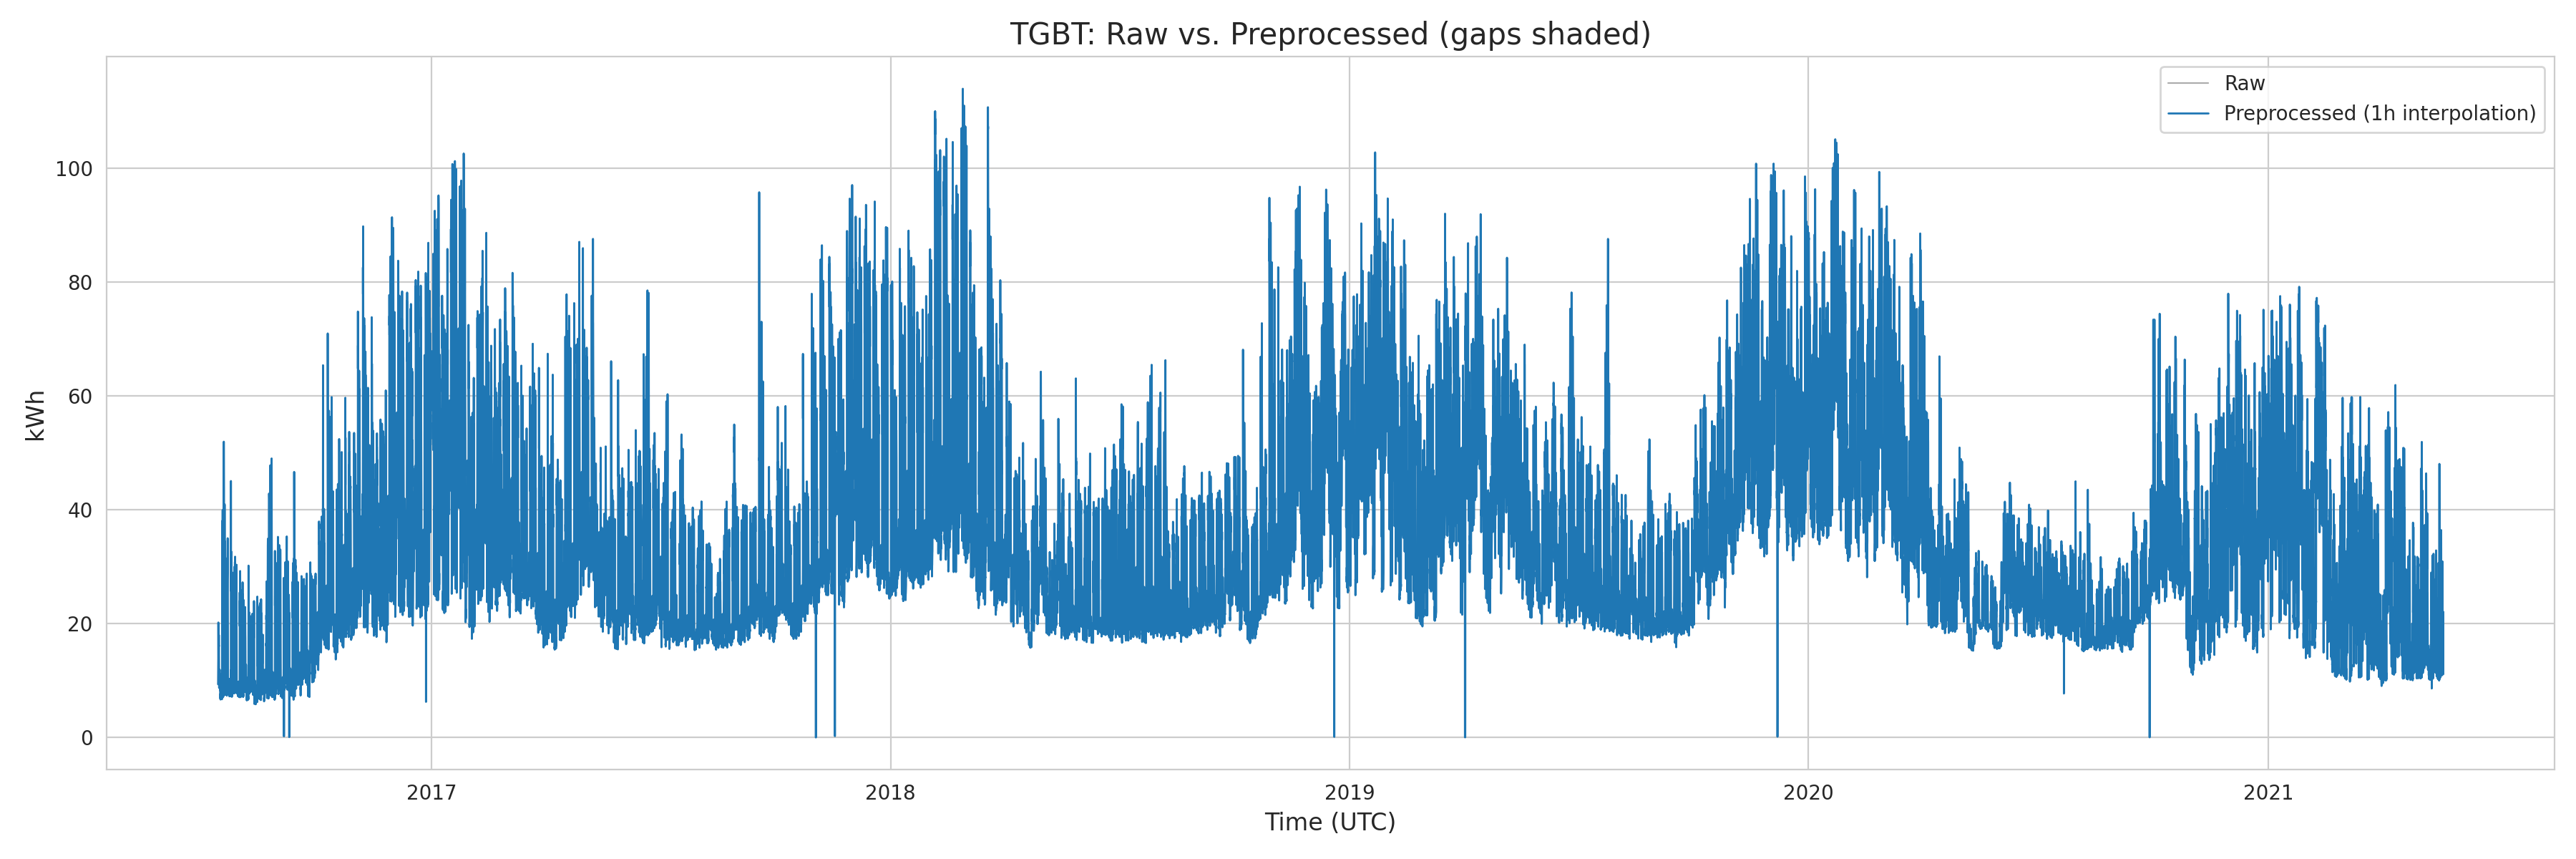

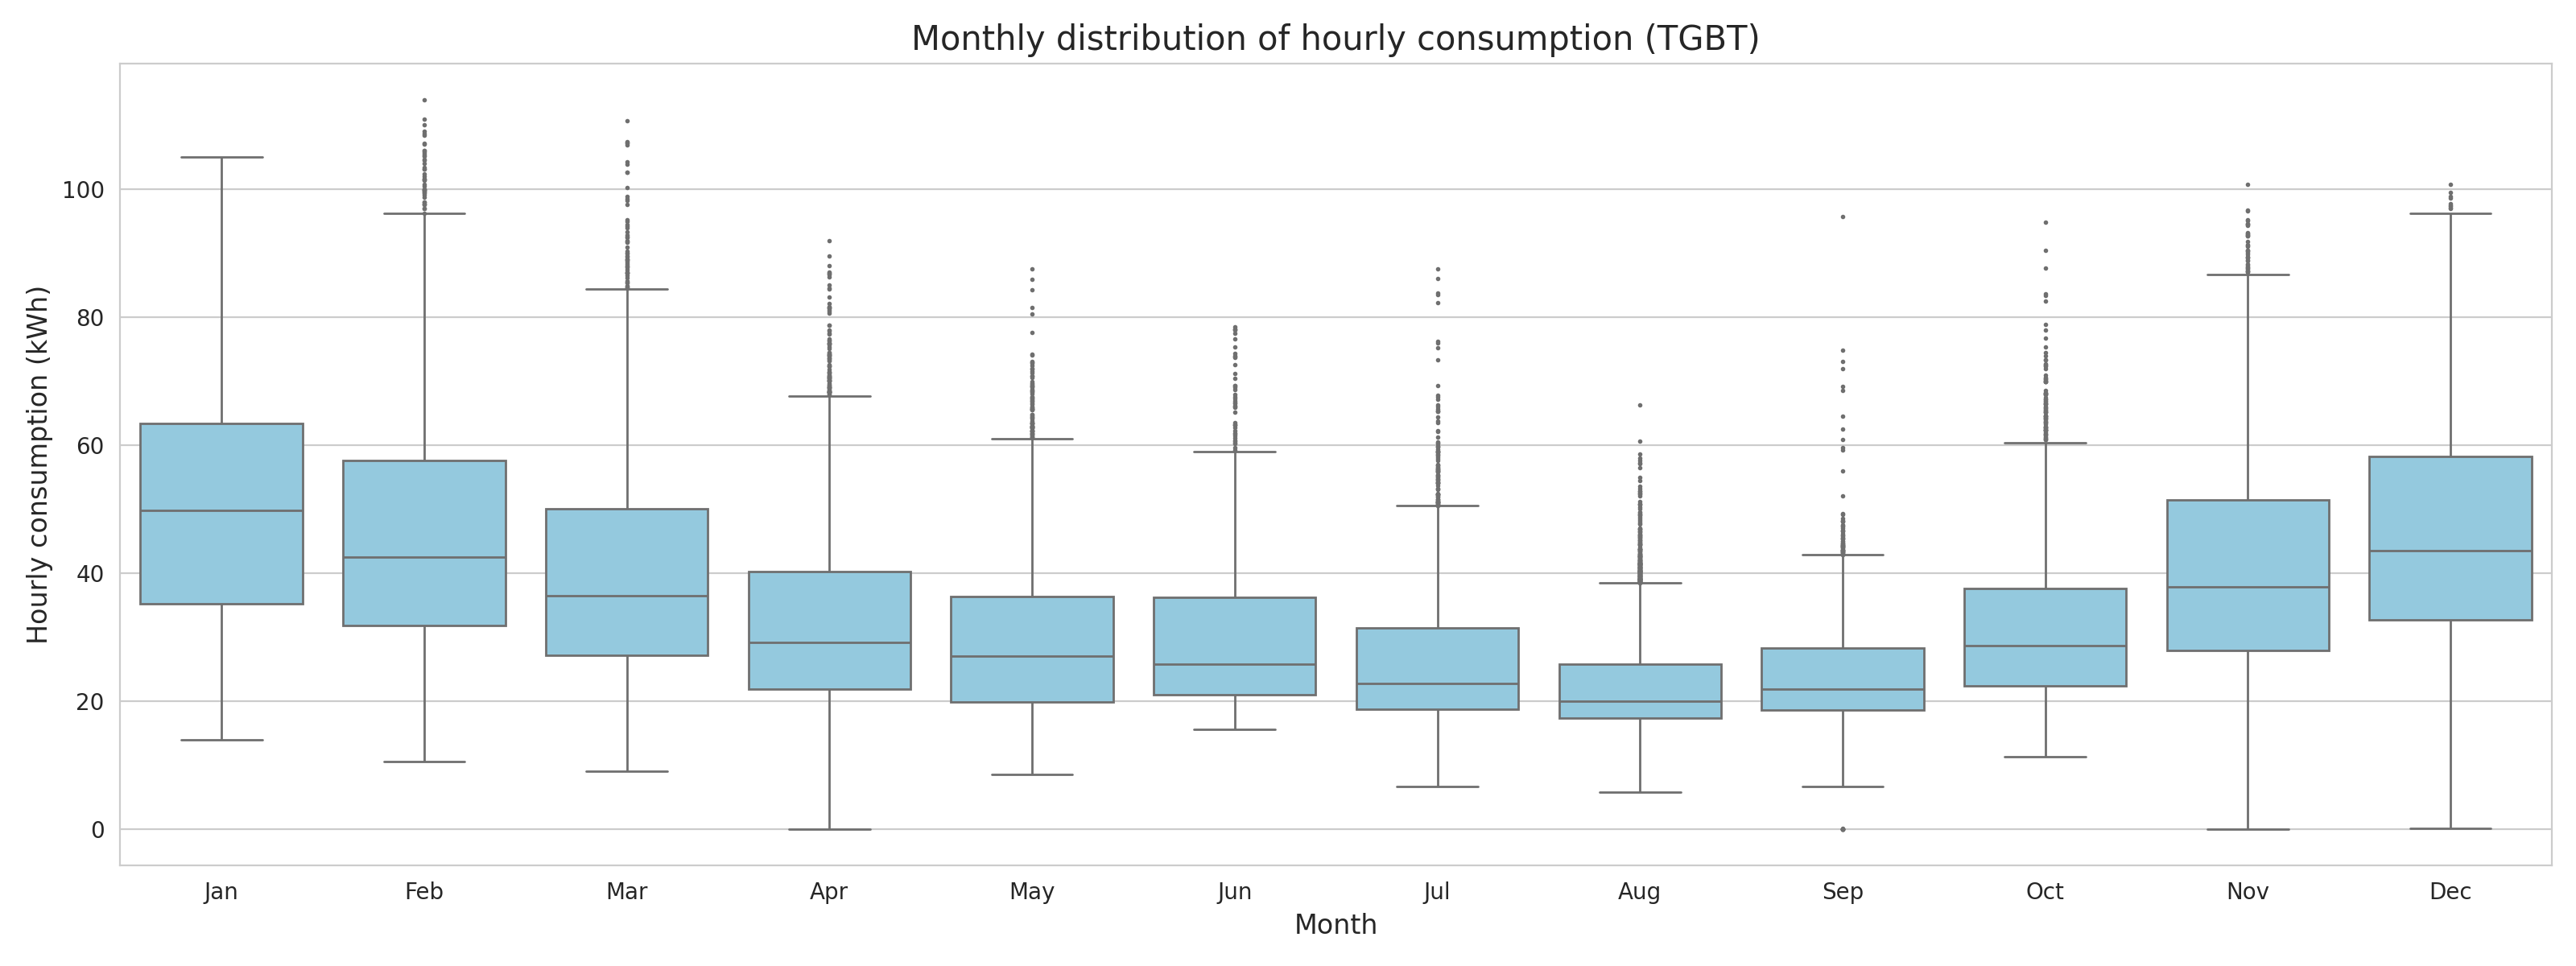

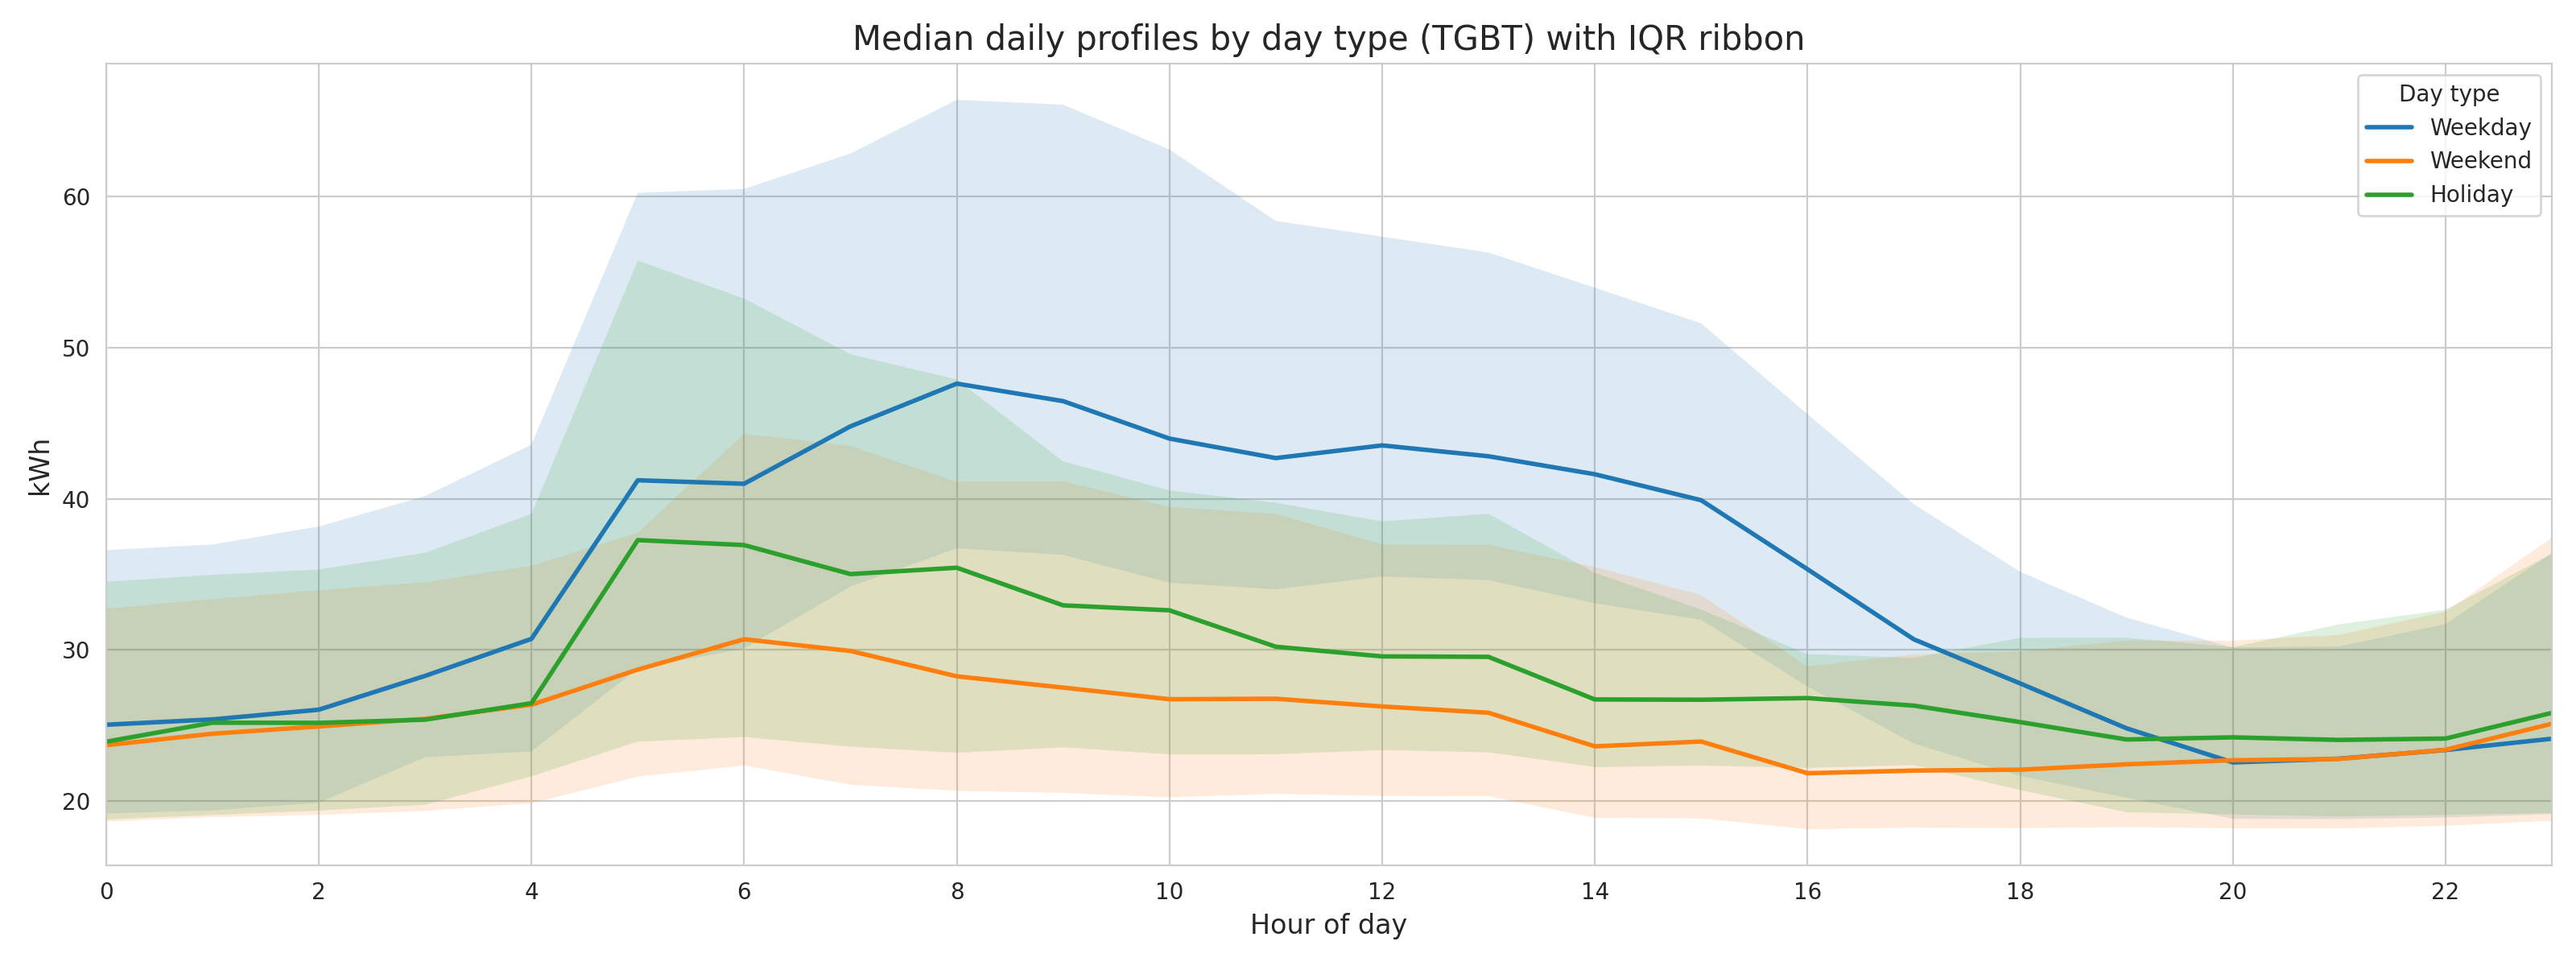

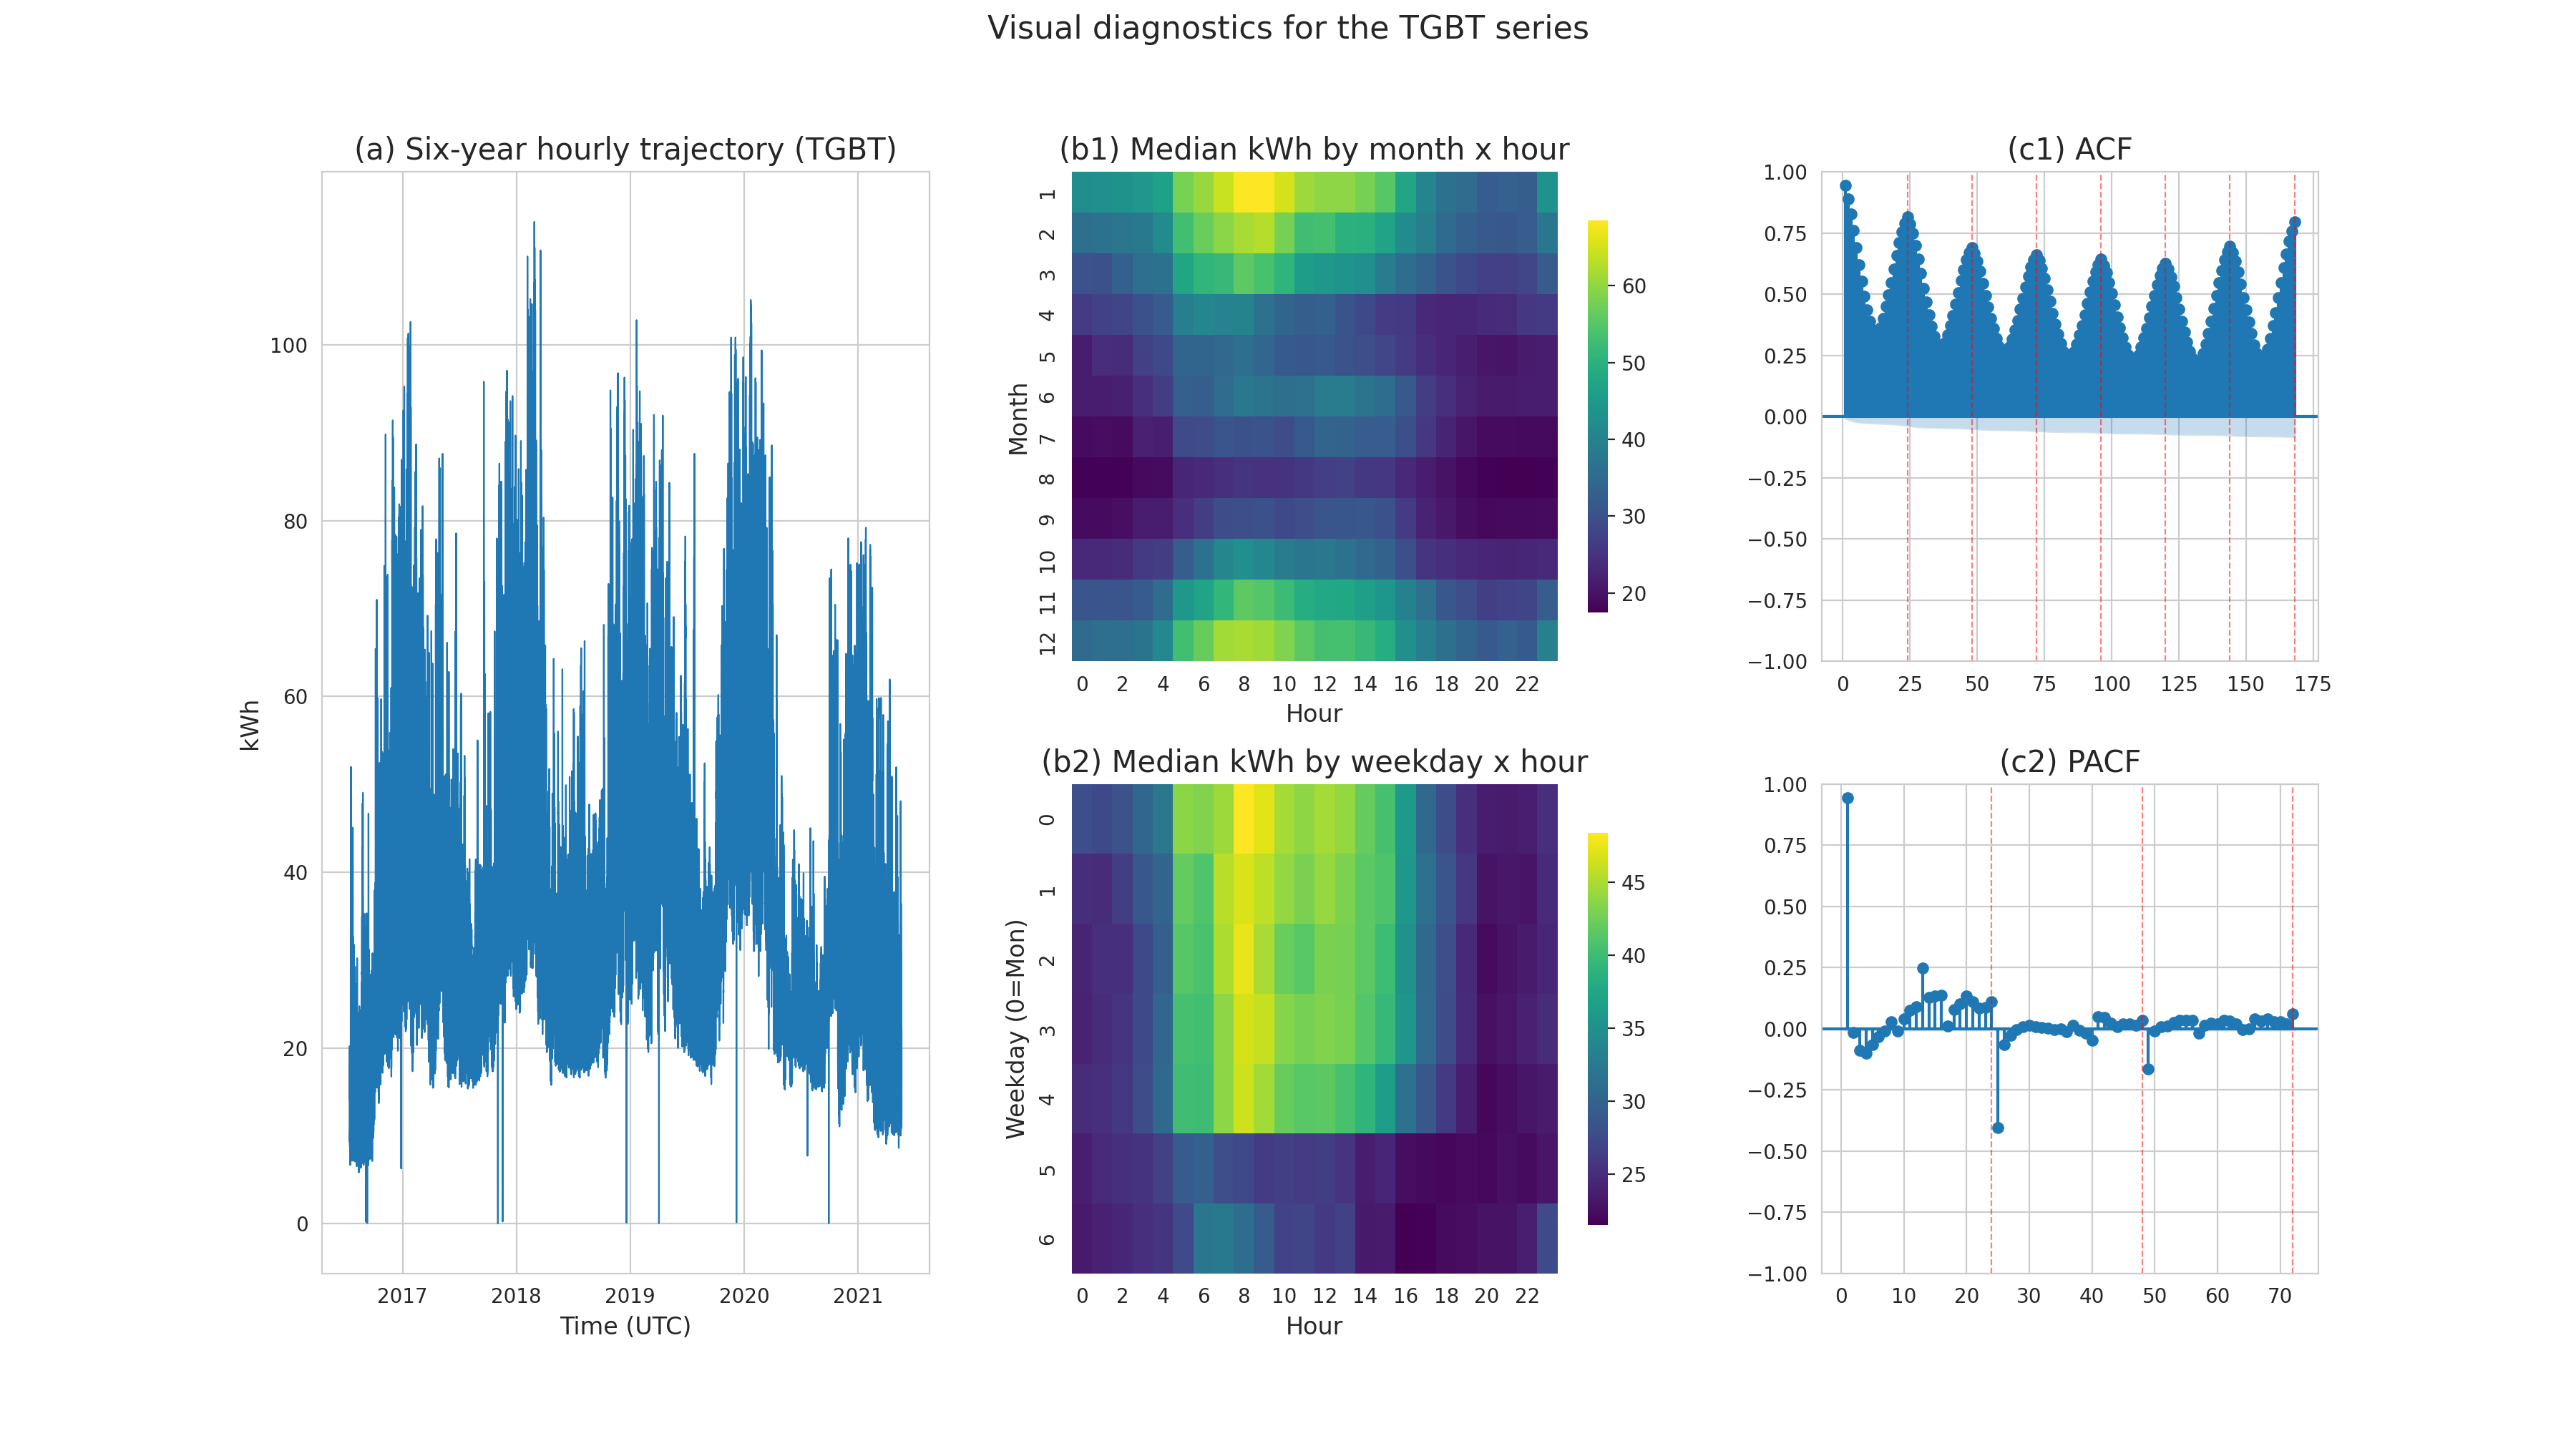

In [14]:
# Run your plotting functions (they save PNGs)
df_hourly, pre_series = plot_raw_vs_preprocessed(df_raw=df_raw, target_col='TGBT',
                                                 out='fig_tgbt_raw_preprocessed.png')
plot_monthly_distribution(pre_series, out='fig_monthly_distribution.png')
plot_daily_profiles(pre_series, out='fig_daily_profiles_weekday_weekend_holiday.png')
plot_visual_diagnostics(pre_series, out='remark1.png')

# Display the saved images inline
from IPython.display import display, Image

display(Image('fig_tgbt_raw_preprocessed.png'))
display(Image('fig_monthly_distribution.png'))
display(Image('fig_daily_profiles_weekday_weekend_holiday.png'))
display(Image('remark1.png'))


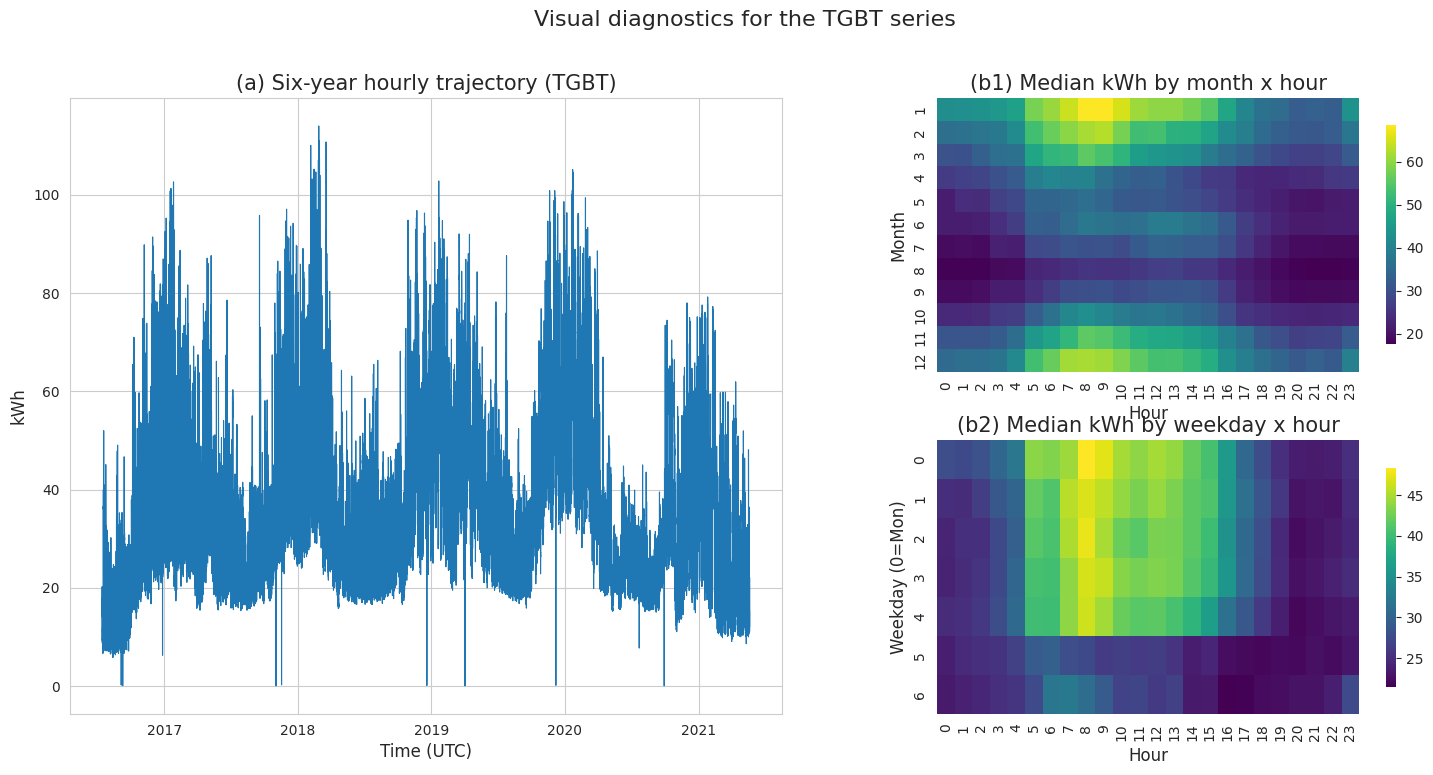

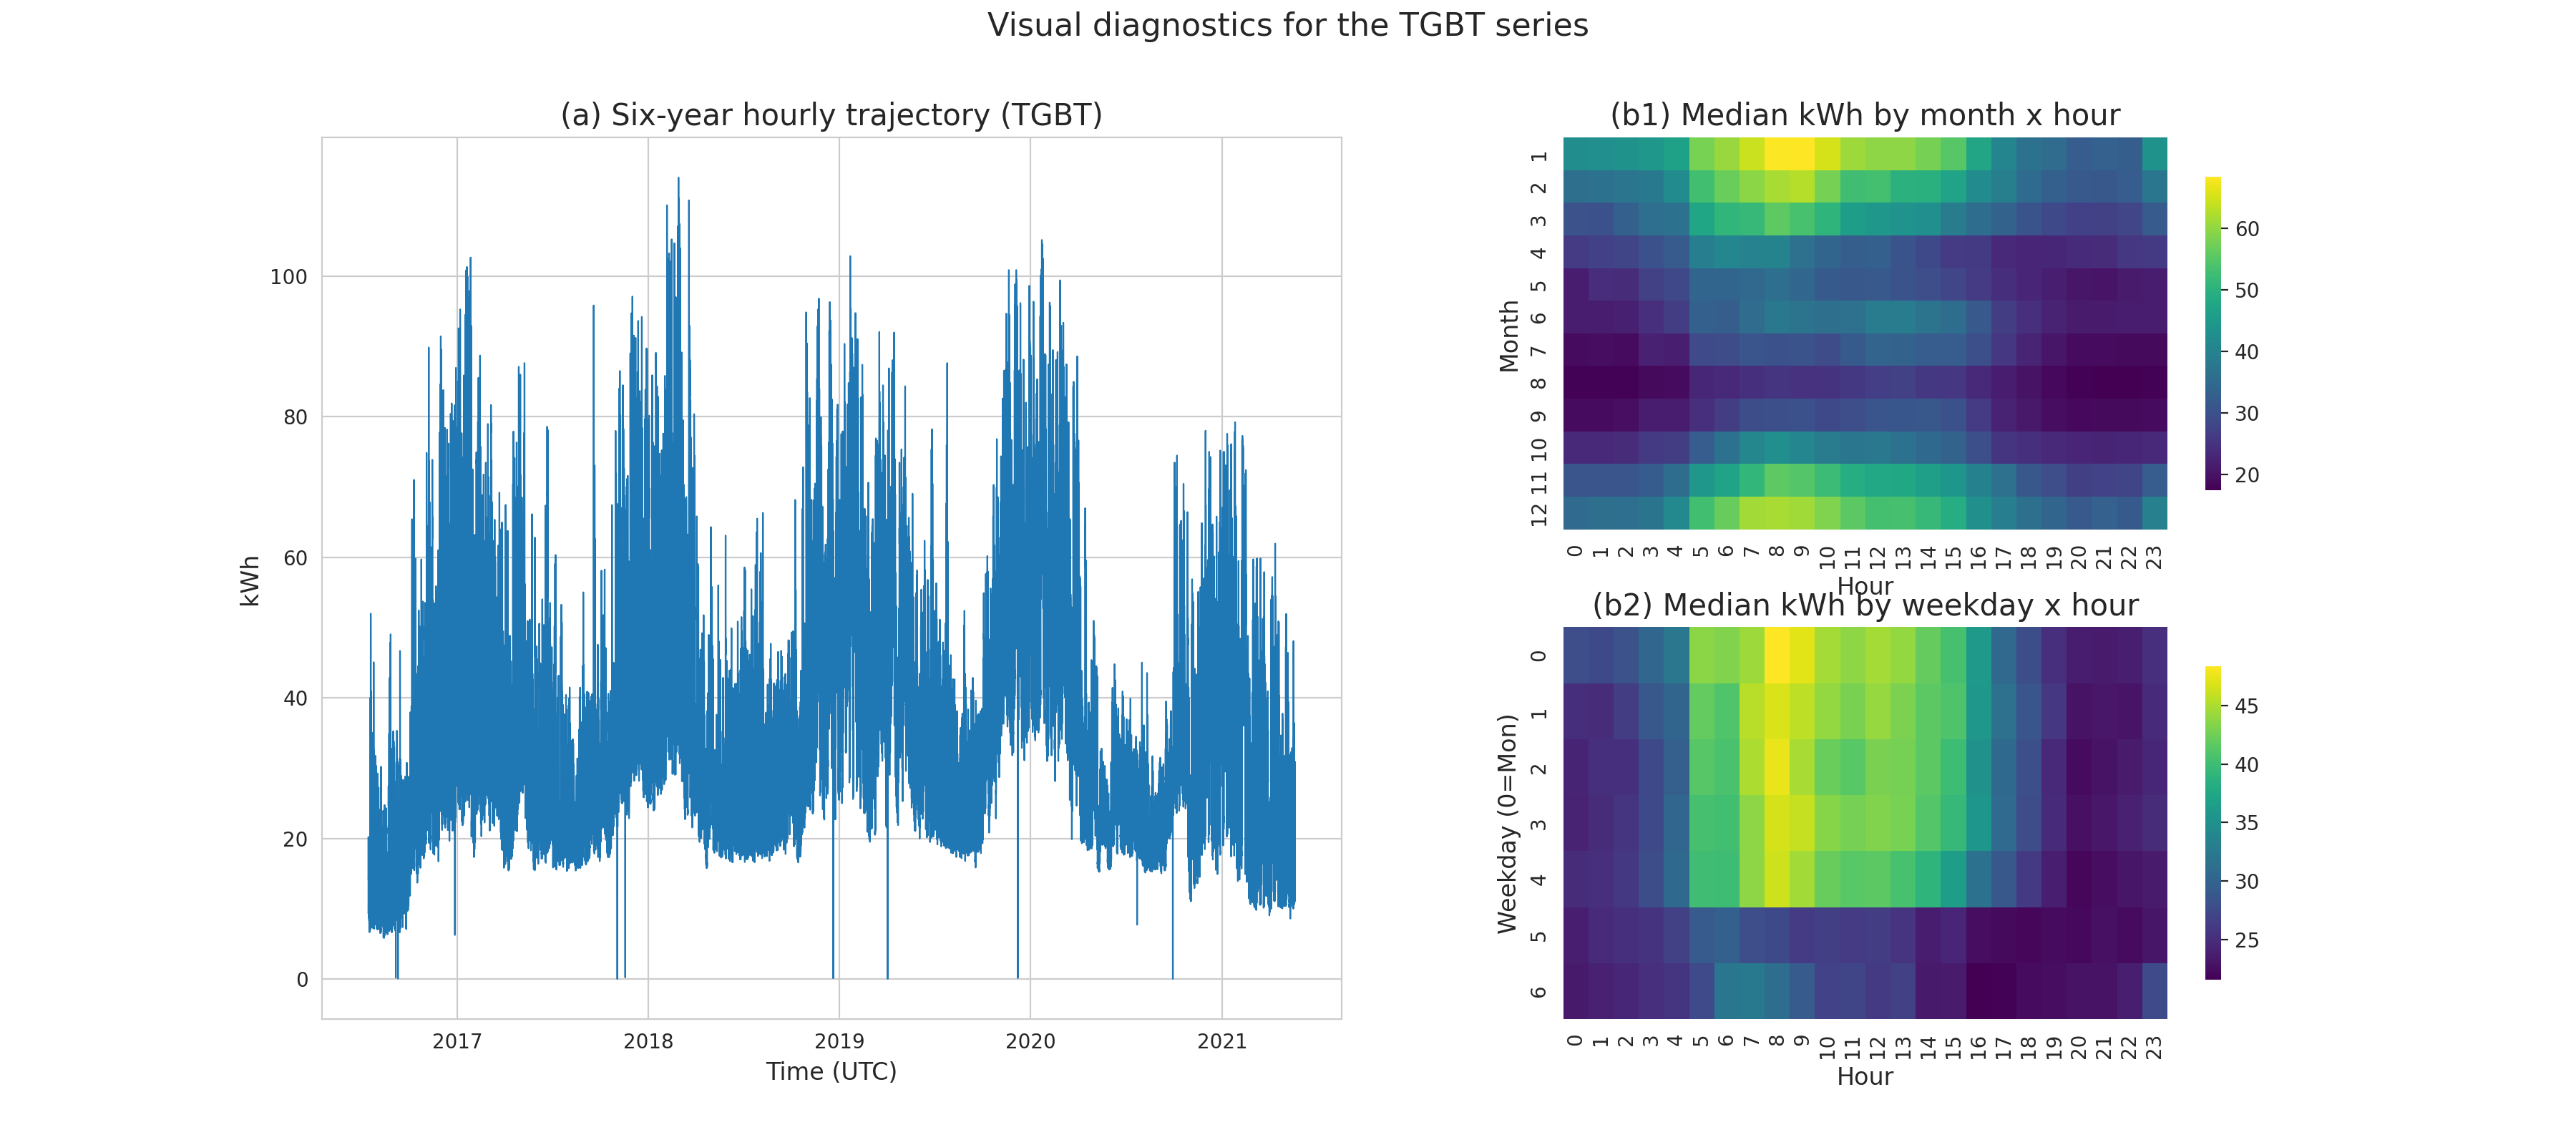

In [15]:
def plot_visual_diagnostics(pre_series, out='remark1.png', show=False):
    """
    Visual diagnostics without ACF/PACF:
      (a) Long-horizon trajectory
      (b1) Month x Hour heatmap (median)
      (b2) Weekday x Hour heatmap (median)
    """
    s = pre_series.copy()

    fig = plt.figure(figsize=(18, 8))
    gs = gridspec.GridSpec(
        2, 2,
        width_ratios=[1.35, 1.0],
        height_ratios=[1, 1],
        wspace=0.25, hspace=0.25
    )

    # (a) Long-horizon trajectory (left, spanning both rows)
    ax_a = plt.subplot(gs[:, 0])
    ax_a.plot(s.index, s.values, color='#1f77b4', lw=0.8)
    ax_a.set_title('(a) Six-year hourly trajectory (TGBT)')
    ax_a.set_xlabel('Time (UTC)')
    ax_a.set_ylabel('kWh')

    # Prep frame for heatmaps
    df = s.to_frame('y').dropna()
    df['month'] = df.index.month
    df['hour'] = df.index.hour

    # (b1) Month x Hour heatmap (top-right)
    ax_b1 = plt.subplot(gs[0, 1])
    month_hour = df.pivot_table(
        index='month', columns='hour', values='y', aggfunc='median'
    ).reindex(range(1, 13))
    sns.heatmap(month_hour, ax=ax_b1, cmap='viridis', cbar_kws={'shrink': 0.8})
    ax_b1.set_title('(b1) Median kWh by month x hour')
    ax_b1.set_xlabel('Hour')
    ax_b1.set_ylabel('Month')

    # (b2) Weekday x Hour heatmap (bottom-right)
    ax_b2 = plt.subplot(gs[1, 1])
    df['weekday'] = df.index.weekday  # 0=Mon .. 6=Sun
    weekday_hour = df.pivot_table(
        index='weekday', columns='hour', values='y', aggfunc='median'
    ).reindex(range(7))
    sns.heatmap(weekday_hour, ax=ax_b2, cmap='viridis', cbar_kws={'shrink': 0.8})
    ax_b2.set_title('(b2) Median kWh by weekday x hour')
    ax_b2.set_xlabel('Hour')
    ax_b2.set_ylabel('Weekday (0=Mon)')

    fig.suptitle('Visual diagnostics for the TGBT series', y=0.99, fontsize=16)
    fig.tight_layout(rect=[0, 0, 1, 0.98])

    if out:
        fig.savefig(out, dpi=200)
    if show:
        plt.show()
    plt.close(fig)

  # Plot the figure (no ACF/PACF), save and show inline
try:
    _ = pre_series  # check if it exists
except NameError:
    # Build pre_series from df_raw if needed
    df_hourly, _gaps = _prepare_hourly(df_raw, target_col='TGBT')
    pre_series = _interpolate_one_hour_gaps(df_hourly['TGBT'])

plot_visual_diagnostics(pre_series, out='remark1.png', show=True)

# Also display the saved PNG (useful in some notebook environments)
from IPython.display import display, Image
display(Image('remark1.png'))


**Section 4: Feature Engineering Pipeline**

Purpose: The primary goal of this section is to define a series of reusable functions that will generate predictive features from our time series data. Creating a modular pipeline is essential for maintaining a clean workflow and, most importantly, for preventing data leakage within our future cross-validation loop. Each fold of the cross-validation will independently call these functions on the training data, ensuring that information from the validation set does not influence the feature creation process.

Actions (define as functions):


*4.1: Time-Based Features*

The most direct way to model the trends and seasonalities we identified in the exploratory data analysis is to explicitly extract them from the timestamp itself. By converting the datetime index into numerical features, we provide the model with clear signals for diurnal, weekly, and annual patterns.
We will create a function create_time_features to perform this extraction.

In [16]:
import pandas as pd

def create_time_features(df: pd.DataFrame) -> pd.DataFrame:
    """
    Creates time-series features from a datetime index.

    Args:
        df: A pandas DataFrame with a DatetimeIndex.

    Returns:
        The DataFrame with the new time-based features added as columns.
    """
    # Make a copy to avoid modifying the original DataFrame
    df = df.copy()

    # Extract features from the DatetimeIndex
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek  # Monday=0, Sunday=6
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear

    print("Successfully created time-based features.")
    return df

# --- Example Usage ---
# Check if the denoised DataFrame exists before applying the function
if 'df_kalman' in locals():
    # Apply the function to our denoised data
    df_features = create_time_features(df_kalman)

    # Display the first few rows with the new features
    # Note: We select the target columns and the newly created features for clarity
    feature_columns = ['hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear']
    display_columns = ['TGBT', 'T1', 'T7'] + feature_columns

    print("\nDataFrame with new time-based features (Head):")
    display(df_features[display_columns].head())
else:
    print("DataFrame 'df_kalman' not found. Please run the Kalman Filter step first.")


DataFrame 'df_kalman' not found. Please run the Kalman Filter step first.


**4.2: Lag Features**

While calendar features capture the timing of events, lag features capture the recent history of the target variable itself. This is often the most powerful type of feature in time series forecasting because of autocorrelation—the tendency for a series to be correlated with its own past values. From our ACF/PACF analysis, we know that the consumption from one hour ago (lag_1) and the same hour yesterday (lag_24) are highly predictive.

We will now create a function create_lag_features that generates these features for any specified target variable. This design allows us to easily create lags for TGBT or any of the individual T1-T7 series later on.

In [17]:
import pandas as pd
from typing import List

def create_lag_features(df: pd.DataFrame, target_col: str, lags: List[int]) -> pd.DataFrame:
    """
    Creates lag features for a specified target column.

    Args:
        df: A pandas DataFrame with a DatetimeIndex.
        target_col: The name of the column to create lags for.
        lags: A list of integers specifying the lag periods.

    Returns:
        The DataFrame with the new lag features added.
    """
    # Make a copy to avoid modifying the original DataFrame
    df = df.copy()

    for lag in lags:
        # The shift() function moves the data down by the specified number of periods
        df[f'{target_col}_lag_{lag}'] = df[target_col].shift(lag)

    print(f"Successfully created lag features for column '{target_col}'.")
    return df

# --- Example Usage ---
# Check if the feature DataFrame exists
if 'df_features' in locals():
    # Define the lags we want to create based on our EDA
    # 1 hour ago, 24 hours ago (yesterday), 168 hours ago (last week)
    lag_periods = [1, 24, 168]
    target_variable = 'TGBT'

    # Apply the function to add lags for the 'TGBT' column
    df_features_with_lags = create_lag_features(df_features, target_variable, lag_periods)

    # Display the result. Note the NaNs introduced at the beginning of the series.
    # These rows will be dropped before training as they lack complete feature information.
    new_lag_cols = [f'{target_variable}_lag_{lag}' for lag in lag_periods]
    display_columns = [target_variable] + new_lag_cols

    print(f"\nDataFrame with new lag features for '{target_variable}' (Head):")
    # We display a later part of the dataframe to show populated values
    display(df_features_with_lags[display_columns].tail())

else:
    print("DataFrame 'df_features' not found. Please run the previous step (create_time_features) first.")


DataFrame 'df_features' not found. Please run the previous step (create_time_features) first.


**4.3: Rolling Window Features**

While lag features look at specific, discrete points in the past (e.g., exactly 24 hours ago), rolling window features summarize a range of recent data. This allows us to capture the evolving trend and volatility of the series, providing the model with a dynamic view of its recent behavior.

For example, a 24-hour rolling mean provides the average consumption over the last day, effectively smoothing out hourly noise to reveal the underlying daily trend. A rolling standard deviation, on the other hand, measures recent volatility.

We will now create a generic function, create_rolling_features, to compute these statistics.

In [18]:
import pandas as pd
from typing import List

def create_rolling_features(df: pd.DataFrame, target_col: str, windows: List[int], aggs: List[str]) -> pd.DataFrame:
    """
    Creates rolling window features for a specified target column.

    Args:
        df: A pandas DataFrame with a DatetimeIndex.
        target_col: The name of the column to create rolling features for.
        windows: A list of integers specifying the window sizes.
        aggs: A list of string aggregation function names (e.g., ['mean', 'std']).

    Returns:
        The DataFrame with the new rolling features added.
    """
    # Make a copy to avoid modifying the original DataFrame
    df = df.copy()

    for window in windows:
        for agg in aggs:
            # Create the rolling window object
            rolling_window = df[target_col].rolling(window=f'{window}H', min_periods=1)

            # Calculate the aggregation
            series = rolling_window.agg(agg)

            # Assign to a new column
            df[f'{target_col}_rolling_{agg}_{window}H'] = series

    print(f"Successfully created rolling features for column '{target_col}'.")
    return df

# --- Example Usage ---
# Check if the feature DataFrame exists
if 'df_features_with_lags' in locals():
    # Define the windows and aggregations
    # We'll look at the last 24 hours and the last 7 days (168 hours)
    window_sizes = [24, 168]
    aggregations = ['mean', 'std', 'skew']
    target_variable = 'TGBT'

    # Apply the function
    df_final_features = create_rolling_features(df_features_with_lags, target_variable, window_sizes, aggregations)

    # Display the result. Note the NaNs at the beginning will be handled later.
    new_rolling_cols = [
        f'{target_variable}_rolling_{agg}_{window}H'
        for window in window_sizes
        for agg in aggregations
    ]
    display_columns = [target_variable] + new_rolling_cols

    print(f"\nDataFrame with new rolling features for '{target_variable}' (Tail):")
    display(df_final_features[display_columns].tail())

else:
    print("DataFrame 'df_features_with_lags' not found. Please run the previous step first.")


DataFrame 'df_features_with_lags' not found. Please run the previous step first.


**4.4 B-Spline Features**

Our standard time-based features (hour, dayofyear) are effective, but they have a limitation: they treat each time unit as a distinct, linear step. For example, a linear model would interpret the difference between hour 2 and 3 as the same as the difference between hour 12 and 13. In reality, the relationship between time and energy consumption is a smooth, non-linear curve.

B-splines (Basis Splines) are a powerful technique to address this. They allow us to capture these complex, smooth seasonal patterns by fitting a series of flexible, piecewise polynomial functions over a time feature. Instead of a single hour column, we generate several hour_spline_ columns, and the model learns weights for each to reconstruct the underlying smooth seasonal curve.

In [19]:
# Before running this cell, you may need to upgrade patsy for cyclic features to work:
# !pip install --upgrade patsy

import pandas as pd
from patsy import dmatrix

def create_bspline_features(df: pd.DataFrame, column: str, df_spline: int, cyclic: bool = False) -> pd.DataFrame:
    """
    Creates B-spline features for a specified column.

    Args:
        df: A pandas DataFrame.
        column: The name of the column to create spline features for (e.g., 'hour', 'dayofyear').
        df_spline: Degrees of freedom for the spline. Controls flexibility.
        cyclic: Whether the feature is cyclic. Requires a modern version of 'patsy'.

    Returns:
        The DataFrame with the new B-spline features added.
    """
    df = df.copy()

    # --- FIX ---
    # Conditionally build the formula string to support older patsy versions
    # that don't recognize the 'cyclic' keyword argument.
    if cyclic:
        formula = f"bs({column}, df={df_spline}, include_intercept=False, cyclic=True) - 1"
    else:
        formula = f"bs({column}, df={df_spline}, include_intercept=False) - 1"

    try:
        spline_matrix = dmatrix(formula, data=df, return_type='dataframe')

        # Rename the columns for clarity
        spline_matrix.columns = [f'{column}_spline_{i+1}' for i in range(spline_matrix.shape[1])]

        # Concatenate the new features
        df = pd.concat([df, spline_matrix], axis=1)

        print(f"Successfully created {df_spline} B-spline features for column '{column}'.")

    except Exception as e:
        print(f"Could not create B-spline features for '{column}'.")
        print("If using 'cyclic=True', please ensure your 'patsy' library is up to date: !pip install --upgrade patsy")
        print(f"Error: {e}")

    return df

# --- Example Usage ---
# Check if the final feature DataFrame exists
if 'df_final_features' in locals():

    # --- Create Splines for Annual Seasonality ---
    # This call should now work even with an older patsy version.
    df_with_splines = create_bspline_features(df_final_features, 'dayofyear', df_spline=6, cyclic=False)

    # --- Create Splines for Diurnal (Daily) Seasonality ---
    # This call requires an updated patsy library to correctly handle the cyclic nature of hours.
    df_with_splines = create_bspline_features(df_with_splines, 'hour', df_spline=10, cyclic=True)

    # Display the result if the columns were created
    spline_cols_day = [f'dayofyear_spline_{i+1}' for i in range(6)]
    spline_cols_hour = [f'hour_spline_{i+1}' for i in range(10)]

    # Check which columns actually exist before trying to display them
    created_cols = [col for col in (spline_cols_day + spline_cols_hour) if col in df_with_splines.columns]

    if created_cols:
        display_columns = ['dayofyear', 'hour'] + created_cols
        print(f"\nDataFrame with new B-spline features (Head):")
        display(df_with_splines[display_columns].head())
    else:
        print("\nNo B-spline features were created. Please check the error messages above.")

else:
    print("DataFrame 'df_final_features' not found. Please run the previous steps first.")


DataFrame 'df_final_features' not found. Please run the previous steps first.


**Section 5: Model Definition**

Purpose: To define the architecture for each model to be benchmarked. Centralizing the model creation code in functions keeps the main experiment loop clean, organized, and easy to modify.

Actions (define as functions):

**5.1: Baseline & Statistical Models**

We begin with our statistical baseline, SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous factors). This is a highly versatile and powerful model for time series forecasting and serves as an excellent benchmark for more complex machine learning and deep learning approaches.
The model can explicitly account for:

AutoRegressive (AR) component (p): Dependency on past values.

Integrated (I) component (d): Use of differencing to make the time series stationary.

Moving Average (MA) component (q): Dependency on past forecast errors.

Seasonality (P, D, Q, m): Seasonal counterparts to the AR, I, and MA components.

eXogenous factors (X): The influence of external features, which is critical for our problem.

We will define a function that constructs an unfitted SARIMAX model instance. The actual training (.fit()) will be performed later within our main cross-validation and benchmarking loop.

In [20]:
# --- Imports for Statistical Models ---
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

# --- Model Definition Function ---

def create_sarimax_model(train_y, train_X, sarimax_params):
    """
    Constructs an unfitted SARIMAX model with specified parameters.

    Args:
        train_y (pd.Series or np.array): The target variable training data (endogenous variable).
        train_X (pd.DataFrame or np.array): The exogenous features for training.
        sarimax_params (dict): A dictionary containing the model's hyperparameters,
                               such as 'order' and 'seasonal_order'.

    Returns:
        statsmodels.tsa.statespace.sarimax.SARIMAX: An unfitted SARIMAX model instance.
    """
    # Ensure endog (y) is a Series or 1D array and exog (X) has a compatible index
    if not isinstance(train_y, pd.Series):
        train_y = pd.Series(train_y)
    if not isinstance(train_X, pd.DataFrame):
        train_X = pd.DataFrame(train_X, index=train_y.index)

    model = SARIMAX(
        endog=train_y,
        exog=train_X,
        order=sarimax_params.get('order', (1, 1, 1)),
        seasonal_order=sarimax_params.get('seasonal_order', (0, 0, 0, 0)),
        enforce_stationarity=False,
        enforce_invertibility=False
    )
    return model

# --- Generate Sample Data for Demonstration ---
# Let's simulate 150 days of data with 2 exogenous features
n_samples = 150
data = {
    'target': np.random.randn(n_samples).cumsum() + np.sin(np.linspace(0, 10, n_samples)) * 5,
    'feature1': np.random.rand(n_samples) * 10,
    'feature2': np.arange(n_samples) * 0.2
}
sample_df = pd.DataFrame(data)

# Split into target and features
train_y_sample = sample_df['target']
train_X_sample = sample_df[['feature1', 'feature2']]

# --- Define Model Hyperparameters ---
# These parameters would typically be found through ACF/PACF analysis or grid search
sarimax_hyperparams = {
    'order': (1, 1, 1),           # (p, d, q)
    'seasonal_order': (1, 1, 0, 12) # (P, D, Q, m) -> m=12 for yearly seasonality on monthly data
}

# --- Create and Verify the Model ---
print("Creating SARIMAX model instance...")
sarimax_model_instance = create_sarimax_model(train_y_sample, train_X_sample, sarimax_hyperparams)

# In a real run, fitting happens in the experiment loop. Here, we fit it to see the summary.
print("Fitting the model to view its summary (this step is for verification only)...")
# Using disp=False to hide convergence messages during fitting
sarimax_results = sarimax_model_instance.fit(disp=False)

# Print the model summary
print("\n" + "="*80)
print("SARIMAX Model Summary")
print("="*80)
print(sarimax_results.summary())
print("="*80)


Creating SARIMAX model instance...
Fitting the model to view its summary (this step is for verification only)...

SARIMAX Model Summary
                                      SARIMAX Results                                      
Dep. Variable:                              target   No. Observations:                  150
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 12)   Log Likelihood                -197.679
Date:                             Sat, 27 Sep 2025   AIC                            407.357
Time:                                     20:35:43   BIC                            424.279
Sample:                                          0   HQIC                           414.231
                                             - 150                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------

**5.2: Classic Machine Learning Baselines**

Next, we define our classic machine learning models. These models treat the time series problem as a standard regression task, where lagged values (and other features) are used to predict a future value. They are simpler than the sequence-to-sequence deep learning models but are computationally efficient and provide a strong performance baseline. We will use implementations from scikit-learn.

In [21]:
# --- Imports for Classic ML Models ---
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# --- Model Definition Functions ---

def create_linear_regression_model(model_params=None):
    """
    Constructs a Linear Regression model.

    Args:
        model_params (dict, optional): Hyperparameters for the model.
                                       For LinearRegression, this is often empty.
                                       Defaults to None.

    Returns:
        sklearn.linear_model.LinearRegression: An unfitted Linear Regression model instance.
    """
    if model_params is None:
        model_params = {}
    return LinearRegression(**model_params)


def create_knn_model(model_params):
    """
    Constructs a K-Nearest Neighbors Regressor model. A pipeline is used
    to scale the data, which is crucial for distance-based algorithms like KNN.

    Args:
        model_params (dict): Hyperparameters for the model, such as 'n_neighbors'.

    Returns:
        sklearn.pipeline.Pipeline: An unfitted KNN model pipeline.
    """
    if model_params is None:
        model_params = {'n_neighbors': 5} # Default value if none provided

    # KNN is sensitive to feature scaling, so we'll wrap it in a pipeline
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsRegressor(**model_params))
    ])
    return model


def create_mlp_model(model_params):
    """
    Constructs a Multi-Layer Perceptron (MLP) Regressor model.
    A pipeline is used to scale the data before feeding it to the neural network.

    Args:
        model_params (dict): Hyperparameters for the MLP, such as 'hidden_layer_sizes'
                               and 'max_iter'.

    Returns:
        sklearn.pipeline.Pipeline: An unfitted MLP model pipeline.
    """
    if model_params is None:
        model_params = {
            'hidden_layer_sizes': (100,),
            'max_iter': 500,
            'random_state': 42
        }

    # MLPs also benefit greatly from feature scaling
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('mlp', MLPRegressor(**model_params))
    ])
    return model

# --- Define Sample Hyperparameters ---
knn_hyperparams = {
    'n_neighbors': 7,
    'weights': 'distance',
    'metric': 'minkowski'
}

mlp_hyperparams = {
    'hidden_layer_sizes': (64, 32),
    'activation': 'relu',
    'solver': 'adam',
    'alpha': 0.0001,
    'max_iter': 1000,
    'early_stopping': True,
    'random_state': 42
}

# --- Create Model Instances ---
print("="*80)
print("Creating Classic ML Model Instances for Verification")
print("="*80)

# 1. Linear Regression
lr_model = create_linear_regression_model()
print("1. Linear Regression Model:\n", lr_model, "\n")

# 2. K-Nearest Neighbors
knn_model = create_knn_model(knn_hyperparams)
print("2. K-Nearest Neighbors Model Pipeline:\n", knn_model, "\n")

# 3. Multi-Layer Perceptron
mlp_model = create_mlp_model(mlp_hyperparams)
print("3. Multi-Layer Perceptron Model Pipeline:\n", mlp_model, "\n")
print("="*80)

# You can inspect the parameters of the models within the pipeline
print("Verifying parameters for KNN model:")
print(knn_model.get_params()['knn'])

print("\nVerifying parameters for MLP model:")
print(mlp_model.get_params()['mlp'])
print("="*80)


Creating Classic ML Model Instances for Verification
1. Linear Regression Model:
 LinearRegression() 

2. K-Nearest Neighbors Model Pipeline:
 Pipeline(steps=[('scaler', StandardScaler()),
                ('knn',
                 KNeighborsRegressor(n_neighbors=7, weights='distance'))]) 

3. Multi-Layer Perceptron Model Pipeline:
 Pipeline(steps=[('scaler', StandardScaler()),
                ('mlp',
                 MLPRegressor(early_stopping=True, hidden_layer_sizes=(64, 32),
                              max_iter=1000, random_state=42))]) 

Verifying parameters for KNN model:
KNeighborsRegressor(n_neighbors=7, weights='distance')

Verifying parameters for MLP model:
MLPRegressor(early_stopping=True, hidden_layer_sizes=(64, 32), max_iter=1000,
             random_state=42)


**5.3: Advanced Ensemble Model**

For our advanced ensemble baseline, we will use XGBoost (Extreme Gradient Boosting). XGBoost is a highly sophisticated gradient boosting algorithm that builds an ensemble of decision trees sequentially, with each new tree correcting the errors of the previous ones. It is renowned for its exceptional performance, speed, and accuracy, especially on the kind of structured, tabular data that results from our feature engineering process.

In [22]:
# --- Imports for Advanced Ensemble Models ---
import xgboost as xgb

# --- Model Definition Function ---

def create_xgboost_model(model_params=None):
    """
    Constructs an XGBoost Regressor model.

    Args:
        model_params (dict, optional): Hyperparameters for the XGBRegressor.
                                       If None, a set of reasonable defaults is used.
                                       Defaults to None.

    Returns:
        xgb.XGBRegressor: An unfitted XGBoost model instance.
    """
    if model_params is None:
        # Define a set of robust default parameters if none are provided
        model_params = {
            'n_estimators': 1000,
            'max_depth': 5,
            'learning_rate': 0.05,
            'subsample': 0.8,
            'colsample_bytree': 0.8,
            'objective': 'reg:squarederror',
            'random_state': 42,
            'n_jobs': -1
        }

    return xgb.XGBRegressor(**model_params)


**5.3: Advanced Ensemble Model**

For our advanced ensemble baseline, we will use XGBoost (Extreme Gradient Boosting). XGBoost is a highly sophisticated gradient boosting algorithm that builds an ensemble of decision trees sequentially, with each new tree correcting the errors of the previous ones. It is renowned for its exceptional performance, speed, and accuracy, especially on the kind of structured, tabular data that results from our feature engineering process.

In [23]:
# --- Imports for Advanced Ensemble Models ---
import xgboost as xgb

# --- Model Definition Function ---

def create_xgboost_model(model_params=None):
    """
    Constructs an XGBoost Regressor model.

    Args:
        model_params (dict, optional): Hyperparameters for the XGBRegressor.
                                       If None, a set of reasonable defaults is used.
                                       Defaults to None.

    Returns:
        xgb.XGBRegressor: An unfitted XGBoost model instance.
    """
    if model_params is None:
        # Define a set of robust default parameters if none are provided
        model_params = {
            'n_estimators': 1000,
            'max_depth': 5,
            'learning_rate': 0.05,
            'subsample': 0.8,
            'colsample_bytree': 0.8,
            'objective': 'reg:squarederror',
            'random_state': 42,
            'n_jobs': -1
        }

    return xgb.XGBRegressor(**model_params)

# --- Define Pre-defined Optimal Hyperparameters ---
# These are example parameters; in a real project, they would be
# determined through a rigorous tuning process.
xgb_hyperparams = {
    'n_estimators': 2000,           # Number of boosting rounds
    'learning_rate': 0.01,          # Step size shrinkage
    'max_depth': 8,                 # Maximum depth of a tree
    'subsample': 0.7,               # Subsample ratio of the training instance
    'colsample_bytree': 0.7,        # Subsample ratio of columns when constructing each tree
    'gamma': 0.1,                   # Minimum loss reduction required to make a further partition
    'objective': 'reg:squarederror',# Specifies the learning task
    'eval_metric': 'rmse',          # Evaluation metric for validation data
    'random_state': 42,             # for reproducibility
    'n_jobs': -1                    # Use all available CPU cores
}


# --- Create and Verify the Model ---
print("="*80)
print("Creating XGBoost Model Instance for Verification")
print("="*80)

xgb_model = create_xgboost_model(xgb_hyperparams)

print("XGBoost Model Instance:\n")
# Printing the model object shows that the parameters have been set correctly
print(xgb_model)
print("\n" + "="*80)

# We can also access specific parameters to confirm
print(f"Model's n_estimators: {xgb_model.get_params()['n_estimators']}")
print(f"Model's learning_rate: {xgb_model.get_params()['learning_rate']}")
print(f"Model's max_depth: {xgb_model.get_params()['max_depth']}")
print("="*80)

# --- Define Pre-defined Optimal Hyperparameters ---
# These are example parameters; in a real project, they would be
# determined through a rigorous tuning process.
xgb_hyperparams = {
    'n_estimators': 2000,           # Number of boosting rounds
    'learning_rate': 0.01,          # Step size shrinkage
    'max_depth': 8,                 # Maximum depth of a tree
    'subsample': 0.7,               # Subsample ratio of the training instance
    'colsample_bytree': 0.7,        # Subsample ratio of columns when constructing each tree
    'gamma': 0.1,                   # Minimum loss reduction required to make a further partition
    'objective': 'reg:squarederror',# Specifies the learning task
    'eval_metric': 'rmse',          # Evaluation metric for validation data
    'random_state': 42,             # for reproducibility
    'n_jobs': -1                    # Use all available CPU cores
}


# --- Create and Verify the Model ---
print("="*80)
print("Creating XGBoost Model Instance for Verification")
print("="*80)

xgb_model = create_xgboost_model(xgb_hyperparams)

print("XGBoost Model Instance:\n")
# Printing the model object shows that the parameters have been set correctly
print(xgb_model)
print("\n" + "="*80)

# We can also access specific parameters to confirm
print(f"Model's n_estimators: {xgb_model.get_params()['n_estimators']}")
print(f"Model's learning_rate: {xgb_model.get_params()['learning_rate']}")
print(f"Model's max_depth: {xgb_model.get_params()['max_depth']}")
print("="*80)



Creating XGBoost Model Instance for Verification
XGBoost Model Instance:

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             feature_weights=None, gamma=0.1, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=2000,
             n_jobs=-1, num_parallel_tree=None, ...)

Model's n_estimators: 2000
Model's learning_rate: 0.01
Model's max_depth: 8
Creating XGBoost Model Instance for Verification
XGBoost Model Instance:

XGBRegressor(base_score=None, 

5.4: Advanced Hybrid Approach: Decomposition + XGBoost

This hybrid strategy combines the strengths of classical decomposition with modern machine learning. The core idea is to simplify the forecasting problem by breaking it down:

Decomposition: We use a classical technique, STL (Seasonal and Trend decomposition using Loess), to separate the time series into three components: trend, seasonality, and residuals.

Component Forecasting:
The trend and seasonality components are often predictable and can be forecasted using simple, reliable methods (e.g., naive persistence for the trend and repeating the last seasonal cycle).

The residual component contains the complex, non-linear patterns that remain after removing the trend and seasonality. This is the part that is difficult to model.


Residual Modeling: We train a powerful machine learning model, such as XGBoost, to forecast only the residuals, using our exogenous features as predictors. This allows the complex model to focus its capacity on the most challenging part of the time series.

The final forecast is the sum of the individual component forecasts. We'll create a custom class to handle this entire process seamlessly.

In [24]:
# --- Imports for Hybrid Models ---
import pandas as pd
import numpy as np
import xgboost as xgb
from statsmodels.tsa.seasonal import STL
from sklearn.base import BaseEstimator, RegressorMixin

# --- Model Definition Class ---

class DecompositionModel(BaseEstimator, RegressorMixin):
    """
    A hybrid forecasting model that decomposes a time series using STL,
    forecasts the trend and seasonality naively, and fits a specified
    machine learning model to predict the residuals.
    """
    def __init__(self, model, seasonal_period):
        """
        Initializes the DecompositionModel.

        Args:
            model: An unfitted scikit-learn compatible regressor model
                   (e.g., XGBRegressor) to be trained on the residuals.
            seasonal_period (int): The seasonal period for STL decomposition
                                   (e.g., 12 for monthly data with yearly seasonality).
        """
        self.model = model
        self.seasonal_period = seasonal_period

    def fit(self, X, y):
        """
        Fits the model. Decomposes the series y, then fits the inner
        model on the residuals using features from X.

        Args:
            X (pd.DataFrame): Exogenous features for training.
            y (pd.Series): The target time series.
        """
        # 1. Decompose the time series
        stl = STL(y, period=self.seasonal_period)
        self.decomposition_ = stl.fit()

        residuals = self.decomposition_.resid

        # 2. Fit the inner model to the residuals
        self.model.fit(X, residuals)

        # 3. Store components needed for forecasting
        self.last_trend_value_ = self.decomposition_.trend.iloc[-1]
        self.last_seasonal_cycle_ = self.decomposition_.seasonal.iloc[-self.seasonal_period:]

        return self

    def predict(self, X):
        """
        Generates forecasts for the steps corresponding to the feature set X.

        Args:
            X (pd.DataFrame): Future exogenous features.

        Returns:
            np.array: The final forecast.
        """
        n_forecast = len(X)

        # 1. Forecast Trend (naive forecast - repeating the last value)
        trend_forecast = np.full(n_forecast, self.last_trend_value_)

        # 2. Forecast Seasonality (repeating the last known seasonal cycle)
        # Use np.tile to repeat the cycle enough times to cover the forecast horizon
        num_reps = (n_forecast // self.seasonal_period) + 1
        seasonal_forecast = np.tile(self.last_seasonal_cycle_.values, num_reps)[:n_forecast]

        # 3. Forecast Residuals using the fitted inner model
        residual_forecast = self.model.predict(X)

        # 4. Combine the forecasts
        final_forecast = trend_forecast + seasonal_forecast + residual_forecast

        return final_forecast

        # --- Function to create XGBoost model from previous step ---
def create_xgboost_model(model_params=None):
    if model_params is None: model_params = {'random_state': 42, 'n_jobs': -1}
    return xgb.XGBRegressor(**model_params)

# --- Generate Sample Data for Demonstration ---
n_samples = 200
seasonal_period = 12
t = np.arange(n_samples)

# Create a time series with trend, seasonality, and random noise
trend = 0.05 * t
seasonality = 5 * np.sin(2 * np.pi * t / seasonal_period)
residuals_noise = np.random.randn(n_samples) * 0.5
y_sample = pd.Series(trend + seasonality + residuals_noise, name="target")

# Create sample exogenous features
X_sample = pd.DataFrame({
    'day_of_year': np.tile(np.arange(1, 366), int(n_samples/365)+1)[:n_samples],
    'time_idx': t
})

# --- Create and Fit the Hybrid Model ---
print("="*80)
print("Creating and Fitting the Decomposition+XGBoost Hybrid Model")
print("="*80)

# 1. Instantiate the inner XGBoost model
xgb_inner_model = create_xgboost_model(
    model_params={'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'random_state': 42}
)

# 2. Instantiate our custom hybrid model
decomposition_xgb_model = DecompositionModel(
    model=xgb_inner_model,
    seasonal_period=seasonal_period
)

# 3. Fit the model on the sample data
print("Fitting the model...")
decomposition_xgb_model.fit(X_sample, y_sample)
print("Model fitting complete.")


# --- Make a Forecast ---
print("\n" + "="*80)
print("Generating a Forecast")
print("="*80)
forecast_horizon = 24

# Create future exogenous features
X_future = pd.DataFrame({
    'day_of_year': np.tile(np.arange(1, 366), 1)[:forecast_horizon],
    'time_idx': np.arange(n_samples, n_samples + forecast_horizon)
})

# Generate predictions
forecast = decomposition_xgb_model.predict(X_future)

print(f"Generated forecast for the next {forecast_horizon} steps:")
print(forecast)
print("\n" + "="*80)



Creating and Fitting the Decomposition+XGBoost Hybrid Model
Fitting the model...
Model fitting complete.

Generating a Forecast
Generated forecast for the next 24 steps:
[ 5.85850896  4.6497948   6.53651431  7.41581072  9.80983594 12.99730882
 14.25498006 15.24585148 14.43518189 12.78910865  9.7723934   7.19532042
  5.93574167  4.72702751  6.80593388  7.02685177  9.86349149 12.98814869
 14.24581993 15.21614328 14.37248275 12.7264095   9.70969425  7.15146995]



**5.5: Interpretable Deep Learning Models**

In this section, we define the functions and classes needed to integrate two state-of-the-art interpretable deep learning models into our experiment. These models, N-BEATS and NeuralProphet, are designed to provide insights into the forecast by decomposing it into components like trend and seasonality, bridging the gap between high performance and transparency.

To make them compatible with our scikit-learn-based pipeline, we will wrap their core logic in custom classes.

**5.5.1: N-BEATS (Neural Basis Expansion Analysis)**

N-BEATS is a powerful deep learning architecture that works without requiring time-series-specific feature engineering. It uses a backward and forward residual link structure to learn and forecast time series data. Its interpretable configuration can decompose the forecast into trend and seasonality components.

We will use the implementation from the darts library, which provides a user-friendly wrapper for PyTorch-based forecasting models.

In [25]:
# # --- Imports for N-BEATS ---
# import pandas as pd
# import numpy as np
# from darts import TimeSeries
# from darts.models import NBEATSModel
# from sklearn.base import BaseEstimator, RegressorMixin

# # --- Wrapper Class for scikit-learn Compatibility ---

# class NBEATSWrapper(BaseEstimator, RegressorMixin):
#     """
#     A scikit-learn compatible wrapper for the Darts N-BEATS model.
#     """
#     def __init__(self, input_chunk_length, output_chunk_length, n_epochs=100, random_state=42, **kwargs):
#         """
#         Initializes the NBEATSWrapper.

#         Args:
#             input_chunk_length (int): The number of past time steps the model will use as input.
#             output_chunk_length (int): The number of future time steps to predict (forecast horizon).
#             n_epochs (int): The number of training epochs.
#             random_state (int): Seed for reproducibility.
#             **kwargs: Additional hyperparameters for the NBEATSModel.
#         """
#         self.input_chunk_length = input_chunk_length
#         self.output_chunk_length = output_chunk_length
#         self.n_epochs = n_epochs
#         self.random_state = random_state
#         self.kwargs = kwargs

#         # In Darts, random_state is passed via a 'pl_trainer_kwargs' dictionary
#         pl_trainer_kwargs = {
#             'accelerator': 'auto',
#             'callbacks': [],
#             'enable_progress_bar': False # Disable progress bar for cleaner logs
#         }

#         self.model = NBEATSModel(
#             input_chunk_length=self.input_chunk_length,
#             output_chunk_length=self.output_chunk_length,
#             n_epochs=self.n_epochs,
#             random_state=self.random_state,
#             pl_trainer_kwargs=pl_trainer_kwargs,
#             **self.kwargs
#         )

#     def fit(self, X, y):
#         """
#         Fits the N-BEATS model.

#         Args:
#             X (pd.DataFrame): Exogenous features (ignored by N-BEATS, but required for API compatibility).
#             y (pd.Series): The target time series.
#         """
#         # Darts requires data to be in its own TimeSeries format
#         series = TimeSeries.from_series(y)
#         self.model.fit(series, verbose=False)
#         return self

#     def predict(self, X):
#         """
#         Makes a forecast.

#         Args:
#             X (pd.DataFrame): Contains information about the forecast horizon.
#                               The number of rows determines the number of steps to predict.

#         Returns:
#             np.array: The forecast.
#         """
#         n_forecast = len(X)
#         prediction = self.model.predict(n=n_forecast)
#         # --- FIX IS HERE ---
#         # The .values() method directly returns the numpy array
#         return prediction.values()

# # --- Model Definition Function ---
# def create_nbeats_model(model_params):
#     """Constructs the N-BEATS wrapper model."""
#     return NBEATSWrapper(**model_params)

# # --- Verification Block ---
# print("="*80)
# print("Creating and Verifying N-BEATS Model (Corrected)")
# print("="*80)
# # --- Generate Sample Data ---
# sample_index = pd.to_datetime(pd.date_range(start='2023-01-01', periods=100, freq='D'))
# y_sample = pd.Series(np.arange(100) + np.sin(np.arange(100)/7) * 10, index=sample_index)
# X_sample = pd.DataFrame({'day_of_week': y_sample.index.dayofweek}, index=sample_index)

# # Define forecast horizon
# forecast_horizon = 12
# future_index = pd.date_range(start=y_sample.index[-1] + pd.Timedelta(days=1), periods=forecast_horizon, freq='D')
# X_future = pd.DataFrame({'day_of_week': future_index.dayofweek}, index=future_index)

# nbeats_params = {
#     'input_chunk_length': 24,
#     'output_chunk_length': 12,
#     'n_epochs': 5, # Using few epochs just for verification
#     'generic_architecture': True,
#     'random_state': 42
# }
# nbeats_model = create_nbeats_model(nbeats_params)
# print("Fitting N-BEATS (this may take a moment)...")
# nbeats_model.fit(X_sample, y_sample)
# nbeats_forecast = nbeats_model.predict(X_future)
# print(f"N-BEATS model created: {nbeats_model.model}")
# print(f"Generated forecast of length: {len(nbeats_forecast)}\n", nbeats_forecast)
# print("="*80, "\n")


**5.5.2: NeuralProphet**

NeuralProphet is an evolution of Facebook's Prophet model, rebuilt with a PyTorch backend. It enhances the original by incorporating deep learning components like an Auto-Regressor (AR-Net) and allows for the inclusion of covariates, while retaining the core interpretability of Prophet.

The library has its own distinct API, so we will create a wrapper class to align it with our experimental setup. A key data requirement for NeuralProphet is a DataFrame with specific column names: ds for the timestamp and y for the target value.

In [26]:
# # --- Imports ---
# import pandas as pd
# import numpy as np
# from neuralprophet import NeuralProphet, set_log_level
# from sklearn.base import BaseEstimator, RegressorMixin
# import logging

# # --- Disable excessive logging ---
# set_log_level("ERROR")
# logging.getLogger("NP").setLevel(logging.ERROR)

# # ------------------------------------------------------------------------------------
# # --- FINAL, ROBUST, AND SAFE MONKEY-PATCH ---
# #
# # This patch permanently fixes the incompatibility between NeuralProphet and
# # newer versions of PyTorch Lightning.
# #
# # It is designed to be "idempotent," meaning this code block can be run multiple
# # times without causing the RecursionError seen in previous attempts. It does this
# # by safely storing the original library function before overwriting it, and
# # checking for that stored function to prevent re-patching.
# # ------------------------------------------------------------------------------------

# from neuralprophet import utils as np_utils
# import pytorch_lightning as pl

# # Check if the patch has already been applied by looking for our backup.
# # This is the key to preventing the RecursionError.
# if not hasattr(np_utils, '_original_configure_trainer'):

#     # 1. Create a safe backup of the original function ON THE MODULE itself.
#     np_utils._original_configure_trainer = np_utils.configure_trainer

#     # 2. Define our new, corrected function.
#     def patched_configure_trainer(config_train, config, *args, **kwargs):
#         """
#         A patched version that filters out the deprecated 'auto_lr_find' key
#         before calling the safely backed-up original function.
#         """
#         clean_config = {k: v for k, v in config.items() if k != "auto_lr_find"}

#         # 3. Call the backed-up original function, not the public one.
#         return np_utils._original_configure_trainer(config_train, clean_config, *args, **kwargs)

#     # 4. Overwrite the public function with our patched version.
#     np_utils.configure_trainer = patched_configure_trainer


# # --- Wrapper Class (no changes needed) ---

# class NeuralProphetWrapper(BaseEstimator, RegressorMixin):
#     def __init__(self, n_epochs=100, freq='D', **kwargs):
#         self.n_epochs = n_epochs
#         self.freq = freq
#         self.kwargs = kwargs
#         self.model = NeuralProphet(epochs=self.n_epochs, **self.kwargs)

#     def fit(self, X, y):
#         if X is not None:
#             df = pd.concat([y.to_frame(name='y'), X], axis=1)
#             for col in X.columns:
#                 if col not in ['ds', 'y']:
#                     self.model.add_future_regressor(name=col)
#         else:
#             df = y.to_frame(name='y')
#         df['ds'] = df.index

#         self.model.fit(df, freq=self.freq)
#         return self

#     def predict(self, X):
#         future_df = X.copy()
#         future_df['ds'] = future_df.index
#         if 'y' not in future_df.columns:
#              future_df['y'] = None
#         future = self.model.make_future_dataframe(df=future_df, periods=len(future_df))
#         forecast = self.model.predict(future)
#         return forecast['yhat1'].tail(len(X)).values

# # --- Model Definition Function ---
# def create_neural_prophet_model(model_params):
#     return NeuralProphetWrapper(**model_params)

# # --- Verification Block ---
# print("="*80)
# print("Creating and Verifying NeuralProphet Model (Safe Patch)")
# print("="*80)

# # --- Generate Sample Data ---
# sample_index = pd.to_datetime(pd.date_range(start='2023-01-01', periods=100, freq='D'))
# y_sample = pd.Series(np.arange(100) + np.sin(np.arange(100)/7) * 10, index=sample_index)
# X_sample = pd.DataFrame({'day_of_week': y_sample.index.dayofweek}, index=sample_index)

# # --- Define forecast horizon ---
# forecast_horizon = 12
# future_index = pd.date_range(start=y_sample.index[-1] + pd.Timedelta(days=1), periods=forecast_horizon, freq='D')
# X_future = pd.DataFrame({'day_of_week': future_index.dayofweek}, index=future_index)

# # --- Define parameters ---
# neural_prophet_params = {
#     'n_epochs': 10,
#     'yearly_seasonality': False,
#     'weekly_seasonality': True,
#     'daily_seasonality': False,
#     'seasonality_mode': 'additive',
#     'freq': 'D'
# }

# neural_prophet_model = create_neural_prophet_model(neural_prophet_params)
# print("Fitting NeuralProphet...")
# neural_prophet_model.fit(X_sample, y_sample)

# print("Making a future forecast...")
# np_forecast = neural_prophet_model.predict(X_future)

# print(f"\nSuccess! NeuralProphet model created successfully.")
# print(f"Generated forecast of length: {len(np_forecast)}\n", np_forecast)
# print("="*80)


In [27]:
# "# --- Generate Sample Data ---
# sample_index = pd.to_datetime(pd.date_range(start='2023-01-01', periods=100, freq='D'))
# y_sample = pd.Series(np.arange(100) + np.sin(np.arange(100)/7) * 10, index=sample_index)
# X_sample = pd.DataFrame({'day_of_week': y_sample.index.dayofweek}, index=sample_index)

# # Define forecast horizon
# forecast_horizon = 12
# future_index = pd.date_range(start=y_sample.index[-1] + pd.Timedelta(days=1), periods=forecast_horizon, freq='D')
# X_future = pd.DataFrame({'day_of_week': future_index.dayofweek}, index=future_index)

# # --- 1. Verify N-BEATS Model ---
# print("="*80)
# print("Creating and Verifying N-BEATS Model")
# print("="*80)
# nbeats_params = {
#     'input_chunk_length': 24,
#     'output_chunk_length': 12,
#     'n_epochs': 5, # Using few epochs just for verification
#     'generic_architecture': True, # Use the simpler generic architecture
#     'random_state': 42
# }
# nbeats_model = create_nbeats_model(nbeats_params)
# print("Fitting N-BEATS (this may take a moment)...")
# nbeats_model.fit(X_sample, y_sample)
# nbeats_forecast = nbeats_model.predict(X_future)
# print(f"N-BEATS model created: {nbeats_model.model}")
# print(f"Generated forecast of length: {len(nbeats_forecast)}\n", nbeats_forecast)
# print("="*80, "\n")

# # --- 2. Verify NeuralProphet Model ---
# #print("="*80)
# #print("Creating and Verifying NeuralProphet Model")
# #print("="*80)
# #neural_prophet_params = {
# #    'n_forecasts': 1,
# #    'n_lags': 5,
# #    'yearly_seasonality': False,
# #    'weekly_seasonality': True,
# #    'daily_seasonality': False
# #}
# #neural_prophet_model = create_neural_prophet_model(neural_prophet_params)
# #print("Fitting NeuralProphet...")
# #neural_prophet_model.fit(X_sample, y_sample)
# #
# # For NeuralProphet, predict requires the number of periods
# # Our wrapper handles creating the future dataframe
# #np_forecast = neural_prophet_model.predict(X_future)

# #print(f"NeuralProphet model created: {neural_prophet_model.model}")
# print(f"Generated forecast of length: {len(np_forecast)}\n", np_forecast)
# print("="*80)

**5.6: Deep Learning Sequence Models (End-to-End)**

This section provides the code for defining our deep learning models. These models are "end-to-end," meaning they learn directly from sequences of past data to predict sequences of future data without relying on manually engineered features like lags or rolling means. Each model is encapsulated in a function that constructs and returns a compiled Keras Model object.

First, we define the custom Keras layers that will be used by our more advanced architectures: Time2Vec and the TransformerEncoder.

In [28]:
# --- Custom Keras Layers for Advanced Models ---

from tensorflow.keras import layers
import tensorflow as tf
import keras

# 5.6.1: Time2Vec Embedding Layer
class Time2Vec(layers.Layer):
    """
    Custom Keras layer for the Time2Vec embedding.
    Paper: Time2Vec: Learning a Vector Representation of Time
    Link: https://arxiv.org/abs/1907.05321
    """
    def __init__(self, kernel_size=1):
        super(Time2Vec, self).__init__()
        self.k = kernel_size

    def build(self, input_shape):
        # ω and φ parameters for the linear and periodic components
        self.weights_linear = self.add_weight(name='weight_linear',
                                              shape=(int(input_shape[-1]),),
                                              initializer='uniform',
                                              trainable=True)
        self.bias_linear = self.add_weight(name='bias_linear',
                                           shape=(int(input_shape[-1]),),
                                           initializer='uniform',
                                           trainable=True)
        self.weights_periodic = self.add_weight(name='weight_periodic',
                                                shape=(int(input_shape[-1]), self.k),
                                                initializer='uniform',
                                                trainable=True)
        self.bias_periodic = self.add_weight(name='bias_periodic',
                                             shape=(int(input_shape[-1]), self.k),
                                             initializer='uniform',
                                             trainable=True)

    def call(self, inputs):
        # The input is the time itself
        time_linear = self.weights_linear * inputs + self.bias_linear
        time_linear = tf.expand_dims(time_linear, axis=-1)

        # The periodic component uses sin()
        time_periodic = tf.math.sin(tf.matmul(inputs, self.weights_periodic) + self.bias_periodic)

        # Concatenate the linear and periodic representations
        return tf.concat([time_linear, time_periodic], axis=-1)

# 5.6.2: Transformer Encoder Block
class TransformerEncoder(layers.Layer):
    """
    Transformer Encoder block, consisting of multi-head attention and a feed-forward network.
    """
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerEncoder, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training=False):
        # Multi-head self-attention
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output) # Residual connection

        # Feed-forward network
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        out2 = self.layernorm2(out1 + ffn_output) # Residual connection
        return out2


With the custom layers defined, we can now create the functions for each model architecture.

In [29]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import (
    Input, Dense, LSTM, Bidirectional, Conv1D, GRU, Dropout, Flatten,
    Concatenate, GlobalAveragePooling1D, Reshape, Lambda
)
from tensorflow.keras.models import Model

# --- Custom Keras Layers for Advanced Models ---

class Time2Vec(layers.Layer):
    """
    Custom Keras layer for the Time2Vec embedding from the paper:
    Time2Vec: Learning a Vector Representation of Time (https://arxiv.org/abs/1907.05321)
    """
    def __init__(self, kernel_size=1, **kwargs):
        super(Time2Vec, self).__init__(**kwargs)
        self.k = kernel_size

    def build(self, input_shape):
        self.weights_linear = self.add_weight(name='weight_linear',
                                              shape=(int(input_shape[-1]),),
                                              initializer='uniform',
                                              trainable=True)
        self.bias_linear = self.add_weight(name='bias_linear',
                                           shape=(int(input_shape[-1]),),
                                           initializer='uniform',
                                           trainable=True)
        self.weights_periodic = self.add_weight(name='weight_periodic',
                                                shape=(int(input_shape[-1]), self.k),
                                                initializer='uniform',
                                                trainable=True)
        self.bias_periodic = self.add_weight(name='bias_periodic',
                                             shape=(int(input_shape[-1]), self.k),
                                             initializer='uniform',
                                             trainable=True)

    def call(self, inputs):
        time_linear = self.weights_linear * inputs + self.bias_linear
        # --- FIX IS HERE: The unnecessary expand_dims is removed ---
        # time_linear = tf.expand_dims(time_linear, axis=-1) # This line was incorrect
        time_periodic = tf.math.sin(tf.matmul(inputs, self.weights_periodic) + self.bias_periodic)
        return tf.concat([time_linear, time_periodic], axis=-1)

class TransformerEncoder(layers.Layer):
    """
    Transformer Encoder block with multi-head attention and a feed-forward network.
    """
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1, **kwargs):
        super(TransformerEncoder, self).__init__(**kwargs)
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential([
            layers.Dense(ff_dim, activation="relu"),
            layers.Dense(embed_dim),
        ])
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training=False):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

# --- Model Definition Functions ---

def create_bilstm_model(input_shape, output_steps):
    """Creates a standard Bidirectional LSTM model."""
    inputs = Input(shape=input_shape)
    x = Bidirectional(LSTM(64, return_sequences=True))(inputs)
    x = Bidirectional(LSTM(32, return_sequences=False))(x)
    x = Dropout(0.2)(x)
    x = Dense(output_steps)(x)
    outputs = Reshape((output_steps, 1))(x)
    model = Model(inputs, outputs, name="BiLSTM_Model")
    model.compile(optimizer='adam', loss='mse')
    return model

def create_wavenet_model(input_shape, output_steps):
    """Creates a WaveNet-style CNN model with dilated convolutions."""
    inputs = Input(shape=input_shape)
    x = inputs
    for i in range(4):
        dilation_rate = 2**i
        x_res = x
        x = Conv1D(filters=32, kernel_size=7, padding='causal', dilation_rate=dilation_rate, activation='relu')(x)
        x = Conv1D(filters=32, kernel_size=7, padding='causal', dilation_rate=dilation_rate)(x)
        if x_res.shape[-1] != x.shape[-1]:
            x_res = Conv1D(filters=32, kernel_size=1, padding='causal')(x_res)
        x = layers.Add()([x, x_res])
    x = Flatten()(x)
    x = Dense(output_steps)(x)
    outputs = Reshape((output_steps, 1))(x)
    model = Model(inputs, outputs, name="WaveNet_Model")
    model.compile(optimizer='adam', loss='mse')
    return model

def create_cnn_lstm_model(input_shape, output_steps):
    """Creates a hybrid CNN-LSTM model."""
    inputs = Input(shape=input_shape)
    x = Conv1D(filters=64, kernel_size=3, activation='relu', padding='causal')(inputs)
    x = layers.MaxPooling1D(pool_size=2)(x)
    x = LSTM(50, return_sequences=False)(x)
    x = Dropout(0.2)(x)
    x = Dense(output_steps)(x)
    outputs = Reshape((output_steps, 1))(x)
    model = Model(inputs, outputs, name="CNN_LSTM_Model")
    model.compile(optimizer='adam', loss='mse')
    return model

def create_tcn_bilstm_model(input_shape, output_steps):
    """Creates a hybrid model combining a TCN block with a BiLSTM."""
    inputs = Input(shape=input_shape)
    x = Conv1D(filters=64, kernel_size=3, dilation_rate=1, activation='relu', padding='causal')(inputs)
    x = Conv1D(filters=64, kernel_size=3, dilation_rate=2, activation='relu', padding='causal')(x)
    x = Conv1D(filters=64, kernel_size=3, dilation_rate=4, activation='relu', padding='causal')(x)
    x = Bidirectional(LSTM(32, return_sequences=False))(x)
    x = Dropout(0.3)(x)
    x = Dense(output_steps)(x)
    outputs = Reshape((output_steps, 1))(x)
    model = Model(inputs, outputs, name="TCN_BiLSTM_Model")
    model.compile(optimizer='adam', loss='mse')
    return model

def create_time2vec_bilstm_model(input_shape, output_steps):
    """Creates a hybrid model combining Time2Vec embedding with a BiLSTM."""
    inputs = Input(shape=input_shape)
    time_input = inputs[:, :, -1]
    feature_input = inputs[:, :, :-1]

    expanded_time_input = Lambda(lambda t: tf.expand_dims(t, axis=-1))(time_input)
    time_embedding = Time2Vec(kernel_size=8)(expanded_time_input)

    x = Concatenate()([feature_input, time_embedding])
    x = Bidirectional(LSTM(64, return_sequences=True))(x)
    x = Bidirectional(LSTM(32, return_sequences=False))(x)
    x = Dropout(0.3)(x)
    x = Dense(output_steps)(x)
    outputs = Reshape((output_steps, 1))(x)

    model = Model(inputs, outputs, name="Time2Vec_BiLSTM_Model")
    model.compile(optimizer='adam', loss='mse')
    return model

def create_time2vec_transformer_model(input_shape, output_steps, num_heads=4, ff_dim=32):
    """Creates a Transformer-based model with Time2Vec embedding."""
    inputs = Input(shape=input_shape)
    time_input = inputs[:, :, -1]
    feature_input = inputs[:, :, :-1]

    expanded_time_input = Lambda(lambda t: tf.expand_dims(t, axis=-1))(time_input)
    time_embedding = Time2Vec(kernel_size=8)(expanded_time_input)

    x = Concatenate()([feature_input, time_embedding])
    embed_dim = x.shape[-1]

    encoder_block = TransformerEncoder(embed_dim, num_heads, ff_dim)
    x = encoder_block(x)
    x = encoder_block(x)

    x = GlobalAveragePooling1D()(x)
    x = Dropout(0.2)(x)
    x = Dense(output_steps)(x)
    outputs = Reshape((output_steps, 1))(x)

    model = Model(inputs, outputs, name="Time2Vec_Transformer_Model")
    model.compile(optimizer='adam', loss='mse')
    return model

# --- Verification Block ---
N_TIMESTEPS_IN = 24
N_FEATURES = 9
N_TIMESTEPS_OUT = 1

sample_input_shape = (N_TIMESTEPS_IN, N_FEATURES)
sample_output_steps = N_TIMESTEPS_OUT

print("="*80)
print("Verifying Deep Learning Model Architectures")
print(f"Sample Input Shape: {sample_input_shape}, Output Steps: {sample_output_steps}")
print("="*80 + "\n")

models = {
    "BiLSTM": create_bilstm_model(sample_input_shape, sample_output_steps),
    "WaveNet": create_wavenet_model(sample_input_shape, sample_output_steps),
    "CNN-LSTM": create_cnn_lstm_model(sample_input_shape, sample_output_steps),
    "TCN-BiLSTM": create_tcn_bilstm_model(sample_input_shape, sample_output_steps),
    "Time2Vec-BiLSTM": create_time2vec_bilstm_model(sample_input_shape, sample_output_steps),
    "Time2Vec-Transformer": create_time2vec_transformer_model(sample_input_shape, sample_output_steps)
}

for name, model in models.items():
    print(f"--- {name} Model Summary ---")
    model.summary()
    print("\n" + "="*80 + "\n")


Verifying Deep Learning Model Architectures
Sample Input Shape: (24, 9), Output Steps: 1

--- BiLSTM Model Summary ---


Model: "BiLSTM_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 24, 9)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 24, 128)        │        37,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 1, 1)           │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,169 (309.25 KB)

 Trainable params: 79,169 (309.25 KB)

 Non-trainable params: 0 (0.00 B)



--- WaveNet Model Summary ---


Model: "WaveNet_Model"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 24, 9)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 24, 32)    │      2,048 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 24, 32)    │      7,200 │ conv1d[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 24, 32)    │        320 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 24, 32)    │          0 │ conv1d_1[0][0],   │
│                     │                   │            │ conv1d_2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_3 (Conv1D)   │ (None, 24, 32)    │      7,200 │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_4 (Conv1D)   │ (None, 24, 32)    │      7,200 │ conv1d_3[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 24, 32)    │          0 │ conv1d_4[0][0],   │
│                     │                   │            │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_5 (Conv1D)   │ (None, 24, 32)    │      7,200 │ add_1[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_6 (Conv1D)   │ (None, 24, 32)    │      7,200 │ conv1d_5[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 24, 32)    │          0 │ conv1d_6[0][0],   │
│                     │                   │            │ add_1[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_7 (Conv1D)   │ (None, 24, 32)    │      7,200 │ add_2[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_8 (Conv1D)   │ (None, 24, 32)    │      7,200 │ conv1d_7[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 24, 32)    │          0 │ conv1d_8[0][0],   │
│                     │                   │            │ add_2[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 768)       │          0 │ add_3[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1)         │        769 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_1 (Reshape) │ (None, 1, 1)      │          0 │ dense_1[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 53,537 (209.13 KB)

 Trainable params: 53,537 (209.13 KB)

 Non-trainable params: 0 (0.00 B)



--- CNN-LSTM Model Summary ---


Model: "CNN_LSTM_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 24, 9)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ (None, 24, 64)         │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        23,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, 1, 1)           │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,843 (97.04 KB)

 Trainable params: 24,843 (97.04 KB)

 Non-trainable params: 0 (0.00 B)



--- TCN-BiLSTM Model Summary ---


Model: "TCN_BiLSTM_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 24, 9)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_10 (Conv1D)              │ (None, 24, 64)         │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_11 (Conv1D)              │ (None, 24, 64)         │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_12 (Conv1D)              │ (None, 24, 64)         │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 64)             │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_3 (Reshape)             │ (None, 1, 1)           │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,393 (200.75 KB)

 Trainable params: 51,393 (200.75 KB)

 Non-trainable params: 0 (0.00 B)



--- Time2Vec-BiLSTM Model Summary ---


Model: "Time2Vec_BiLSTM_Model"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 24, 9)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item (GetItem)  │ (None, 24)        │          0 │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, 24, 1)     │          0 │ get_item[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_1          │ (None, 24, 8)     │          0 │ input_layer_4[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time2_vec           │ (None, 24, 9)     │         18 │ lambda[0][0]      │
│ (Time2Vec)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 24, 17)    │          0 │ get_item_1[0][0], │
│ (Concatenate)       │                   │            │ time2_vec[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_3     │ (None, 24, 128)   │     41,984 │ concatenate[0][0] │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_4     │ (None, 64)        │     41,216 │ bidirectional_3[… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 64)        │          0 │ bidirectional_4[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 1)         │         65 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_4 (Reshape) │ (None, 1, 1)      │          0 │ dense_4[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 83,283 (325.32 KB)

 Trainable params: 83,283 (325.32 KB)

 Non-trainable params: 0 (0.00 B)



--- Time2Vec-Transformer Model Summary ---


Model: "Time2Vec_Transformer_Model"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 24, 9)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_2          │ (None, 24)        │          0 │ input_layer_5[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_1 (Lambda)   │ (None, 24, 1)     │          0 │ get_item_2[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_3          │ (None, 24, 8)     │          0 │ input_layer_5[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time2_vec_1         │ (None, 24, 9)     │         18 │ lambda_1[0][0]    │
│ (Time2Vec)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 24, 17)    │          0 │ get_item_3[0][0], │
│ (Concatenate)       │                   │            │ time2_vec_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ transformer_encoder │ (None, 24, 17)    │      6,050 │ concatenate_1[0]… │
│ (TransformerEncode… │                   │            │ transformer_enco… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 17)        │          0 │ transformer_enco… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 17)        │          0 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 1)         │         18 │ dropout_7[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_5 (Reshape) │ (None, 1, 1)      │          0 │ dense_7[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 6,086 (23.77 KB)

 Trainable params: 6,086 (23.77 KB)

 Non-trainable params: 0 (0.00 B)

**Section 6: Benchmarking via Rolling Cross-Validation**

Purpose: The core of the notebook. Systematically train and evaluate each model across multiple time-ordered folds to get a robust estimate of performance on unseen data. This approach mimics a real-world scenario where a model is periodically retrained on new data.

Actions:

**6.1: Setup**

Purpose: To prepare all the necessary components for the main experiment loop: the cross-validation strategy, the models to be tested, and a container for storing the results.

Implementation:

Initialize TimeSeriesSplit from scikit-learn: This object is crucial for creating training and validation splits that respect the temporal order of the data, preventing lookahead bias.

Define a dictionary of models to test: We use a dictionary as a "model registry." This allows us to easily loop through and benchmark every architecture, from statistical baselines to advanced deep learning hybrids. The keys are human-readable names, and the values are functions that return a compiled, untrained model instance.

Initialize a list to store all results: A simple list is created to collect performance metrics from each fold for each model. This list will be converted into a pandas DataFrame in the final step for easy aggregation and analysis.

In [30]:
import numpy as np
import pandas as pd

from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Classic ML
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb

# TF/Keras
import tensorflow as tf
from tensorflow.keras import Model, Sequential, Input
from tensorflow.keras.layers import Dense, Dropout, Conv1D, LSTM, Bidirectional, MaxPooling1D
from tensorflow.keras.layers import GlobalAveragePooling1D, LayerNormalization

# Optional: keras-tcn (install if needed)
try:
    from tcn import TCN
except Exception:
    TCN = None

# Reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
tf.random.set_seed(RANDOM_STATE)

# Seq params (adjust as needed)
TIME_STEPS = 24  # lookback
OUTPUT_STEPS = 1 # forecast horizon


**6.2: The Main Experiment Loop**

This is the core of our analysis. The following code iterates through each model and each time-series fold. Crucially, feature engineering and data scaling are performed inside the loop for each fold. This prevents data leakage from the validation set into the training process, ensuring a robust and reliable evaluation of model performance.

In [31]:
# === Preliminary Setup for Section 6.2 (fixed) ===
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Model, Sequential, Input
from tensorflow.keras.layers import (
    Dense, Dropout, Conv1D, LSTM, Bidirectional,
    MaxPooling1D, GlobalAveragePooling1D, LayerNormalization
)

# Optional: keras-tcn (only needed for TCN-BiLSTM)
try:
    from tcn import TCN
except Exception:
    TCN = None

# --- Placeholder Data ---
date_rng = pd.date_range(start='2020-01-01', end='2022-12-31', freq='D')
data = pd.DataFrame(date_rng, columns=['date'])
data['TARGET'] = np.random.randn(len(data)).cumsum() + 50
data['feature1'] = np.random.rand(len(data)) * 10
data['feature2'] = np.random.rand(len(data)) * 20
data = data.set_index('date')

TARGET_COL = 'TARGET'

# --- Feature Engineering (placeholder) ---
def apply_feature_engineering(df):
    df_out = df.copy()
    df_out['day_of_week'] = df_out.index.dayofweek
    df_out['month'] = df_out.index.month
    return df_out

# --- Keras dataset helper (1-step ahead) ---
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X.iloc[i:i + time_steps].values)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

# Sequence parameters
TIME_STEPS = 30     # lookback window
OUTPUT_STEPS = 1    # forecast horizon (set >1 if you implement multi-step)

print("Preliminary setup is complete.")

# --- ML baselines ---
def create_sarimax_model():
    return "SARIMAX"  # token; fit SARIMAX directly in your loop if used

def create_linear_regression_model():
    return LinearRegression()

def create_kneighbors_regressor_model():
    return KNeighborsRegressor(n_neighbors=5, n_jobs=-1)

def create_mlp_regressor_model():
    return MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

def create_xgboost_model():
    return xgb.XGBRegressor(objective='reg:squarederror', n_estimators=500, random_state=42, n_jobs=-1)

def create_decomposition_xgb_model():
    return "Decomposition_XGB"

# --- Time2Vec utility ---
class Time2Vec(tf.keras.layers.Layer):
    def __init__(self, k=16, activation="sin", **kwargs):
        super().__init__(**kwargs)
        self.k = k
        self.activation = activation
        self.lin = Dense(1)
        self.per = Dense(k)
    def call(self, x):
        periodic = tf.math.sin(self.per(x)) if self.activation == "sin" else tf.math.cos(self.per(x))
        return tf.concat([self.lin(x), periodic], axis=-1)

# --- Deep models (use output_dim default=1 to avoid NameError) ---
def create_bilstm_model(input_shape, output_dim=1, lstm_units=64, dropout=0.2):
    m = Sequential([
        Input(shape=input_shape),
        Bidirectional(LSTM(lstm_units, return_sequences=True)),
        Bidirectional(LSTM(lstm_units // 2)),
        Dropout(dropout),
        Dense(output_dim)
    ])
    m.compile(optimizer='adam', loss='mse')
    return m

def create_cnn_lstm_model(input_shape, output_dim=1,
                          filters=64, kernel_size=3, pool_size=2, lstm_units=64, dropout=0.2):
    i = Input(shape=input_shape)
    x = Conv1D(filters, kernel_size, padding='causal', activation='relu')(i)
    x = MaxPooling1D(pool_size=pool_size)(x)
    x = LSTM(lstm_units)(x)
    x = Dropout(dropout)(x)
    o = Dense(output_dim)(x)
    m = Model(i, o, name="CNN_LSTM")
    m.compile(optimizer='adam', loss='mse')
    return m

def create_tcn_bilstm_model(input_shape, output_dim=1,
                            nb_filters=64, kernel_size=3, dilations=(1, 2, 4, 8),
                            lstm_units=48, dropout=0.1):
    if TCN is None:
        raise ImportError("keras-tcn is not installed. pip install keras-tcn")
    i = Input(shape=input_shape)
    x = TCN(nb_filters=nb_filters, kernel_size=kernel_size, dilations=list(dilations),
            dropout_rate=dropout, return_sequences=True, activation='relu')(i)
    x = Bidirectional(LSTM(lstm_units))(x)
    x = Dropout(dropout)(x)
    o = Dense(output_dim)(x)
    m = Model(i, o, name="TCN_BiLSTM")
    m.compile(optimizer='adam', loss='mse')
    return m

def create_time2vec_bilstm_model(input_shape, output_dim=1, t2v_k=16, lstm_units=48, dropout=0.1):
    i = Input(shape=input_shape)
    x = Time2Vec(k=t2v_k, activation='sin')(i)
    x = Bidirectional(LSTM(lstm_units, return_sequences=True))(x)
    x = Bidirectional(LSTM(max(8, lstm_units // 2)))(x)
    x = Dropout(dropout)(x)
    o = Dense(output_dim)(x)
    m = Model(i, o, name="Time2Vec_BiLSTM")
    m.compile(optimizer=tf.keras.optimizers.Adam(8e-4), loss='mse')
    return m

def _transformer_block(x, num_heads=4, key_dim=32, ff_dim=128, dropout=0.1):
    attn = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=key_dim)(x, x)
    attn = Dropout(dropout)(attn)
    x = LayerNormalization(epsilon=1e-6)(x + attn)
    ff = Sequential([Dense(ff_dim, activation='gelu'), Dropout(dropout), Dense(x.shape[-1])])
    y = ff(x)
    y = LayerNormalization(epsilon=1e-6)(x + y)
    return y

def create_time2vec_transformer_model(input_shape, output_dim=1,
                                      t2v_k=16, layers_n=2, num_heads=4, key_dim=32, ff_dim=128, dropout=0.1):
    i = Input(shape=input_shape)
    x = Time2Vec(k=t2v_k, activation='sin')(i)
    d_model = max(32, t2v_k + 1)
    x = Dense(d_model)(x)
    for _ in range(layers_n):
        x = _transformer_block(x, num_heads=num_heads, key_dim=key_dim, ff_dim=ff_dim, dropout=dropout)
    x = GlobalAveragePooling1D()(x)
    o = Dense(output_dim)(x)
    m = Model(i, o, name="Time2Vec_Transformer")
    m.compile(optimizer='adam', loss='mse')
    return m

def create_wavenet_model(input_shape, output_dim=1,
                         residual_channels=32, skip_channels=64, filters=32,
                         kernel_size=2, dilations=(1, 2, 4, 8, 16, 32), stacks=1, dropout=0.0):
    i = Input(shape=input_shape)
    x = Conv1D(residual_channels, 1, padding='causal')(i)
    skips = []
    def block(x_in, d):
        f = Conv1D(filters, kernel_size, padding='causal', dilation_rate=d)(x_in)
        g = Conv1D(filters, kernel_size, padding='causal', dilation_rate=d)(x_in)
        z = tf.math.tanh(f) * tf.math.sigmoid(g)
        if dropout > 0: z = Dropout(dropout)(z)
        skip = Conv1D(skip_channels, 1, padding='same')(z)
        res  = Conv1D(residual_channels, 1, padding='same')(z)
        return x_in + res, skip
    y = x
    for _ in range(stacks):
        for d in dilations:
            y, s = block(y, d)
            skips.append(s)
    s = tf.keras.layers.Add()(skips)
    s = tf.keras.layers.Activation('relu')(s)
    s = Conv1D(skip_channels, 1, activation='relu')(s)
    s = Conv1D(skip_channels, 1, activation='relu')(s)
    s = GlobalAveragePooling1D()(s)
    o = Dense(output_dim)(s)
    m = Model(i, o, name="WaveNet")
    m.compile(optimizer='adam', loss='mse')
    return m


Preliminary setup is complete.


In [32]:
models_to_test = {
    # Statistical baseline (kept as token unless you wire SARIMAX fit)
    'SARIMAX': create_sarimax_model,

    # Classic ML
    'LinearRegression': create_linear_regression_model,
    'KNeighborsRegressor': create_kneighbors_regressor_model,
    'MLPRegressor': create_mlp_regressor_model,
    'XGBRegressor': create_xgboost_model,

    # Hybrid token
    'Decomposition_XGB': create_decomposition_xgb_model,

    # Deep learning sequence models
    'BiLSTM': lambda input_shape: create_bilstm_model(input_shape, OUTPUT_STEPS),
    'CNN-LSTM': lambda input_shape: create_cnn_lstm_model(input_shape, OUTPUT_STEPS),
    'TCN-BiLSTM': lambda input_shape: create_tcn_bilstm_model(input_shape, OUTPUT_STEPS),
    'Time2Vec-BiLSTM': lambda input_shape: create_time2vec_bilstm_model(input_shape, OUTPUT_STEPS),
    'Time2Vec-Transformer': lambda input_shape: create_time2vec_transformer_model(input_shape, OUTPUT_STEPS),
    'WaveNet': lambda input_shape: create_wavenet_model(input_shape, OUTPUT_STEPS),
}

def create_dataset(X, y, time_steps=TIME_STEPS, output_steps=OUTPUT_STEPS):
    Xs, ys = [], []
    for i in range(len(X) - time_steps - output_steps + 1):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps:i+time_steps+output_steps])
    Xs = np.array(Xs)
    ys = np.array(ys).squeeze()  # (n,) if output_steps==1 else (n, output_steps)
    return Xs, ys

def make_sequences_for_split(X_train, y_train, X_val, y_val, time_steps=TIME_STEPS, output_steps=OUTPUT_STEPS):
    # Train sequences (strictly within train)
    X_tr_seq, y_tr_seq = create_dataset(X_train, y_train, time_steps, output_steps)

    # Validation sequences built from concatenated series so windows can cross the boundary
    X_all = np.vstack([X_train, X_val])
    y_all = np.concatenate([y_train, y_val])
    X_all_seq, y_all_seq = create_dataset(X_all, y_all, time_steps, output_steps)

    n_train = len(X_train)
    anchors = np.arange(time_steps + output_steps - 1, time_steps + output_steps - 1 + len(X_all_seq))
    mask_val = (anchors >= n_train) & (anchors < n_train + len(X_val))

    X_val_seq = X_all_seq[mask_val]
    y_val_seq = y_all_seq[mask_val]
    return X_tr_seq, y_tr_seq, X_val_seq, y_val_seq



In [33]:
DEEP_PREFIXES = ('BiLSTM', 'CNN', 'TCN', 'Time2Vec', 'WaveNet')

for model_name, model_fn in models_to_test.items():
    print(f"\n=== {model_name} ===")

    # Example per-fold (assuming you already prepared X_train_scaled, y_train_scaled, X_val_scaled, y_val_scaled in the fold)
    if model_name in ['LinearRegression', 'KNeighborsRegressor', 'MLPRegressor', 'XGBRegressor']:
        model = model_fn()
        model.fit(X_train_scaled, y_train_scaled.ravel())
        preds_scaled = model.predict(X_val_scaled)
        y_true_scaled = y_val_scaled.ravel()

    elif model_name.startswith(DEEP_PREFIXES):
        # Build sequences
        X_tr_seq, y_tr_seq, X_val_seq, y_val_seq = make_sequences_for_split(
            X_train_scaled, y_train_scaled.ravel(),
            X_val_scaled, y_val_scaled.ravel(),
            TIME_STEPS, OUTPUT_STEPS
        )
        if X_tr_seq.shape[0] == 0 or X_val_seq.shape[0] == 0:
            print("Skipping: not enough data to form sequences with given TIME_STEPS/OUTPUT_STEPS.")
            continue

        input_shape = (X_tr_seq.shape[1], X_tr_seq.shape[2])
        model = model_fn(input_shape)
        model.fit(X_tr_seq, y_tr_seq, epochs=10, batch_size=32, verbose=0)
        preds_scaled = model.predict(X_val_seq, verbose=0).squeeze()
        y_true_scaled = y_val_seq.squeeze()

    else:
        print(f"Skipping model '{model_name}': training logic not implemented.")
        continue

    # Inverse scale if you scaled y (example for MinMaxScaler named y_scaler)
    try:
        preds = y_scaler.inverse_transform(preds_scaled.reshape(-1, OUTPUT_STEPS)).squeeze()
        y_true = y_scaler.inverse_transform(y_true_scaled.reshape(-1, OUTPUT_STEPS)).squeeze()
    except Exception:
        preds = preds_scaled
        y_true = y_true_scaled

    rmse = mean_squared_error(y_true, preds, squared=False)
    mae = mean_absolute_error(y_true, preds)
    mape = mean_absolute_percentage_error(y_true, preds)
    print(f"RMSE={rmse:.4f}  MAE={mae:.4f}  MAPE={mape:.4f}")



=== SARIMAX ===
Skipping model 'SARIMAX': training logic not implemented.

=== LinearRegression ===


NameError: name 'X_train_scaled' is not defined